In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from model import Market
import seaborn as sns
from agents import Firm
from model import Market

import networkx as nx


In [2]:
n_households = 500
n_firms = 50
firms_production = 12
min_income = 0
max_income = 10
min_quality = 0
max_quality = 1
decrease_price = 0.2
increase_price = 0.1
price_change = 0.01
toy_mode = False

model = Market(F=n_firms, H=n_households, firms_production=firms_production,
                min_income=min_income, max_income=max_income, 
                min_quality=min_quality, max_quality=max_quality,
                decrease_price=decrease_price, increase_price=increase_price,
                price_change=price_change, toy_mode=toy_mode )
steps = 1000
for i in range(steps):
    #print('step', i)
    model.step()
    

/Users/ataberna/Documents/WWCS_2023/WWCS_2023_markets/model.py:110: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  prev = nx.adjacency_matrix(self.graphs[-1]).A
/Users/ataberna/Documents/WWCS_2023/WWCS_2023_markets/model.py:111: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  curr = nx.adjacency_matrix(self.G).A


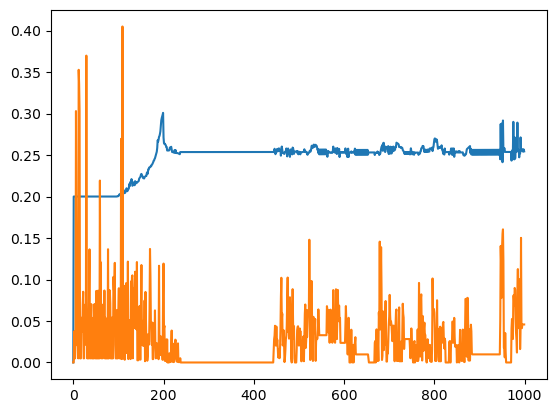

HHI  Distance
0    0.000000  0.000000
1    0.200000  0.000000
2    0.200000  0.037479
3    0.200000  0.004975
4    0.200000  0.004975
..        ...       ...
995  0.254415  0.045816
996  0.256762  0.045810
997  0.254424  0.045813
998  0.256771  0.045807
999  0.254433  0.045811

[1000 rows x 2 columns]

In [3]:
a = model.datacollector.get_model_vars_dataframe()
a['HHI'].plot()
a['Distance'].plot()
plt.show()
a

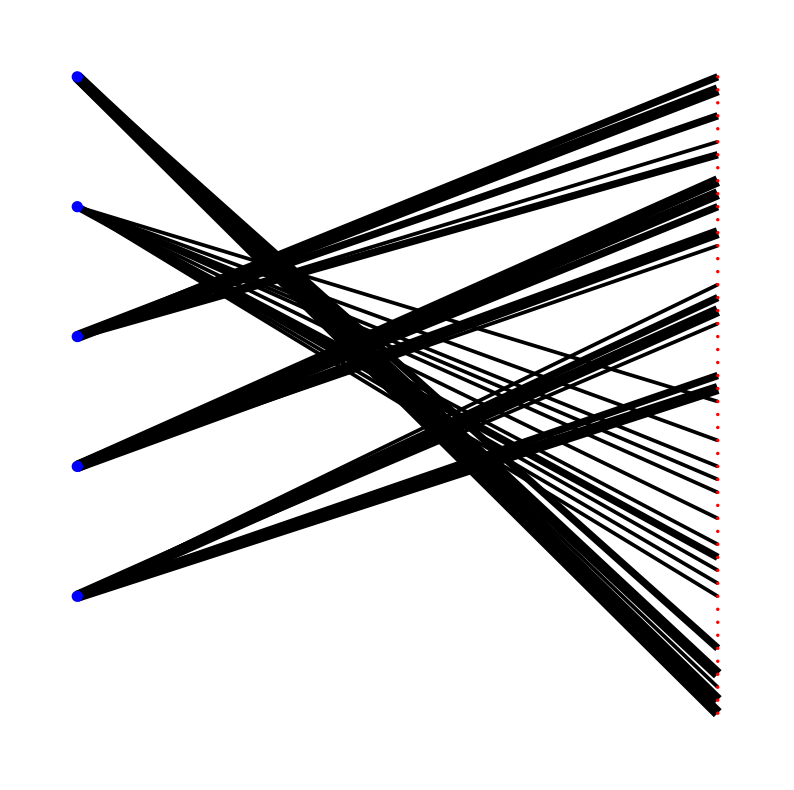

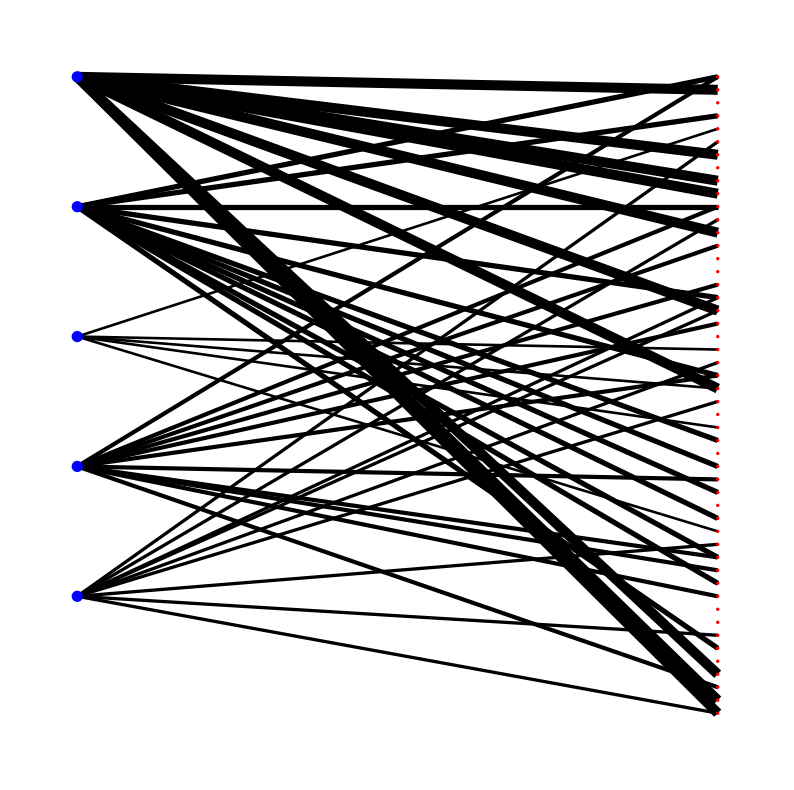

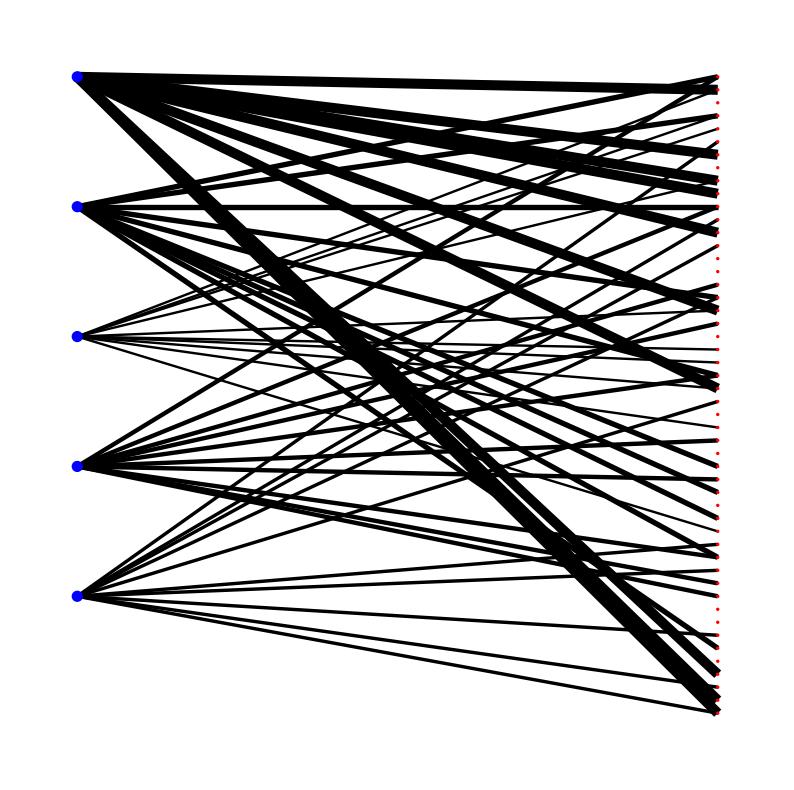

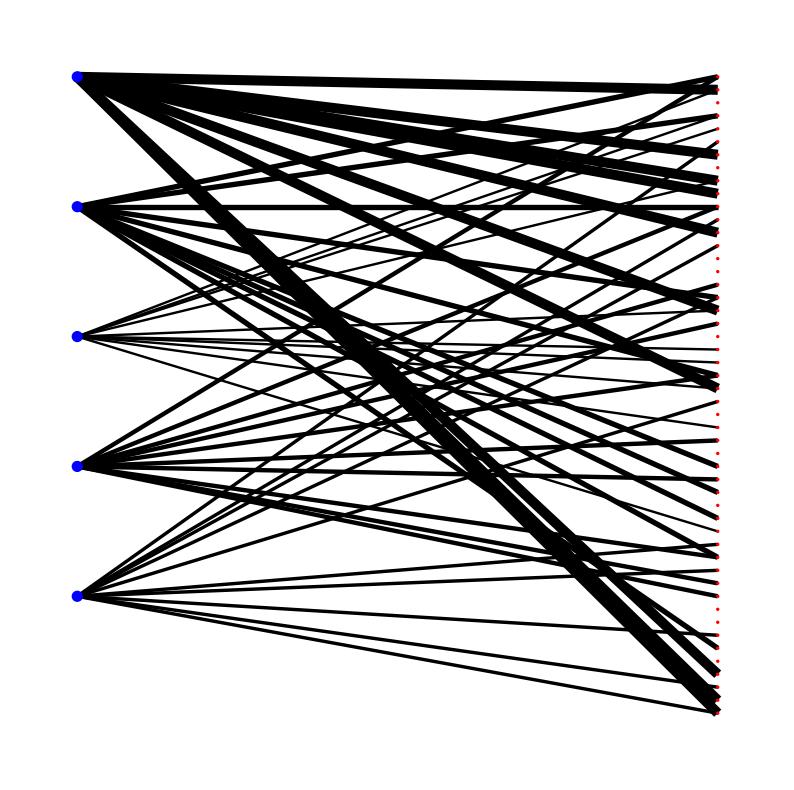

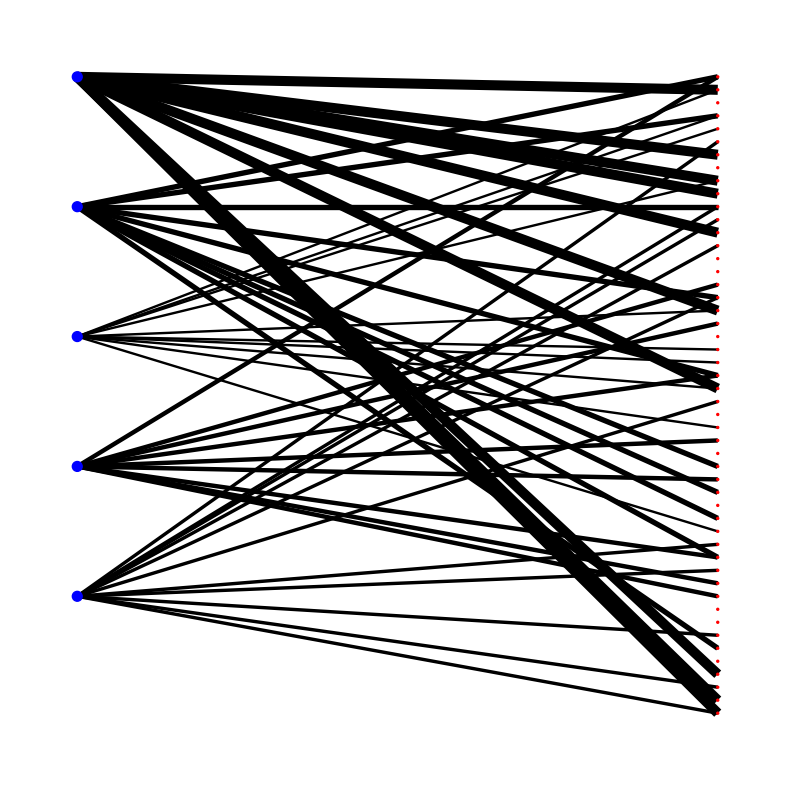

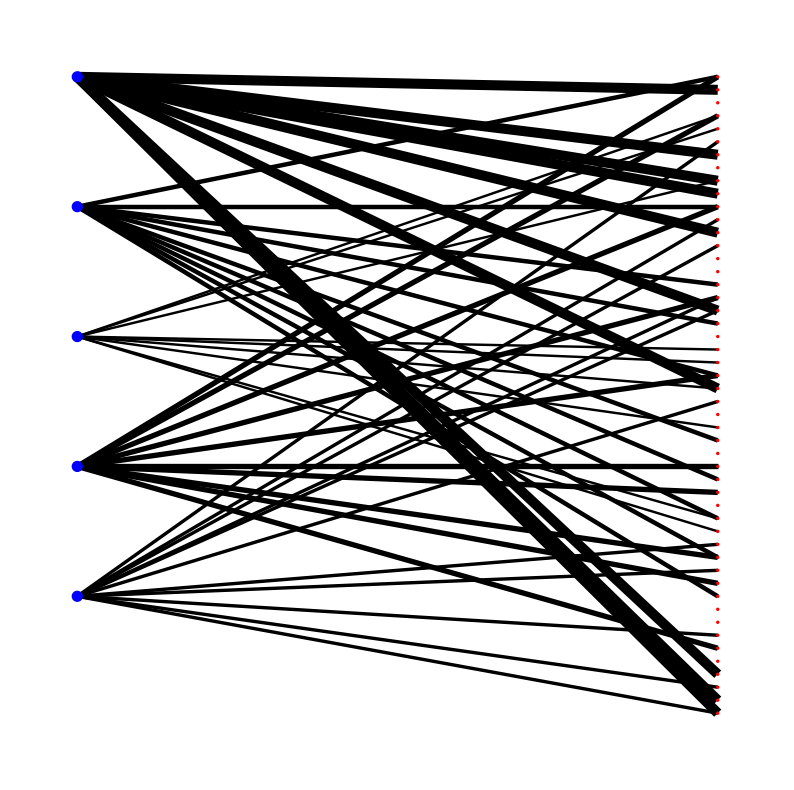

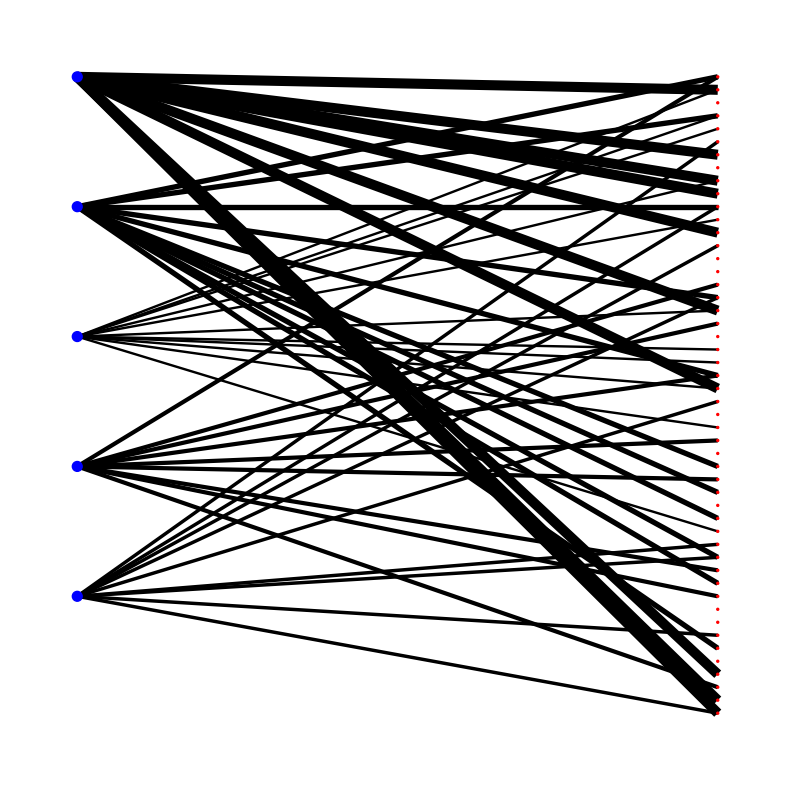

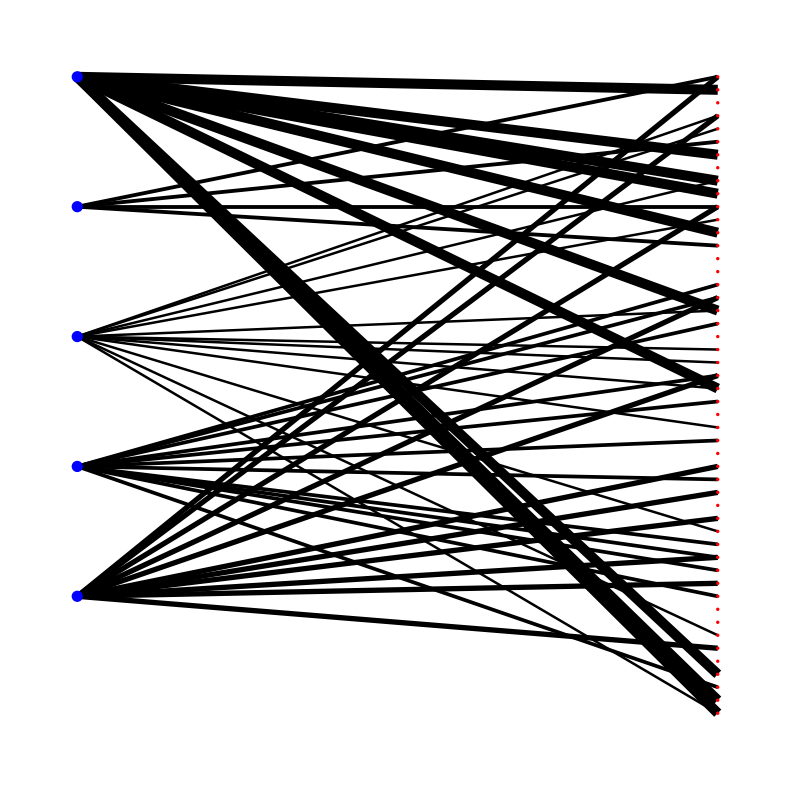

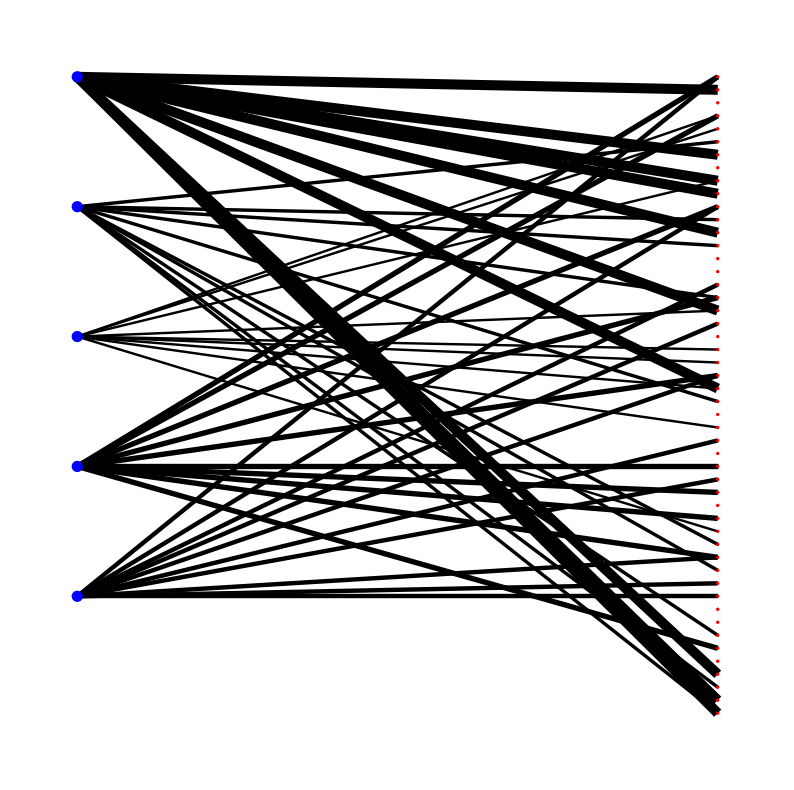

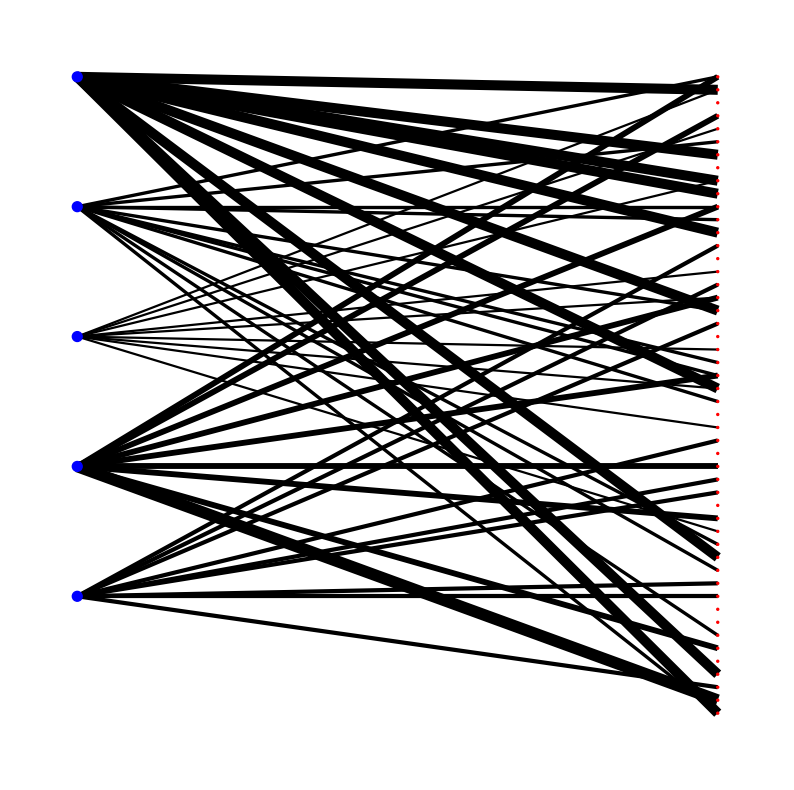

In [4]:
# draw the graph of the last step with  Weight
# remove the nodes with no edges
for i in range(1, len(model.graphs)):
    if i % 100 == 0:
        # model.graphs[i].remove_nodes_from(list(nx.isolates(model.graphs[i])))
        # color the nodes by type
        color_map = []
        node_map = []
        pos = {}
        f = 1
        h = 1
        for node in model.graphs[i]:
            if type(node) is Firm:
                color_map.append('blue')
                node_map.append(50)
                pos[node] = (1, f * 10)
                f += 1
            else:
                color_map.append('red')
                node_map.append(2)
                pos[node] = (2, h)
                h += 1
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        # draw the bipartite graph using the node color map

        nx.draw(model.graphs[i], with_labels=False, width=[model.graphs[i][u][v]['weight'] for u,v in model.graphs[i].edges()], node_color = color_map, node_size = node_map, pos=pos)
        #plt.show()



In [5]:
df = model.datacollector.get_agent_vars_dataframe().reset_index()

In [6]:
# for each Step, computes the HHI for each Firm
df_firm = df.loc[df['Type'] == 'Firm']
# normalize df_firm['Revenue'] in each Step
df_firm['Market_share'] = df_firm.groupby(['Step'])['Revenue'].transform(lambda x: x/x.sum())
# square the Market_share
df_firm['R'] = df_firm['Market_share']**2
# compute the HHI
HHI = df_firm.groupby(['Step'])['R'].sum()

#df_firm['HHI'] = df_firm.groupby(['Step'])['Revenue'].transform(lambda x: x**2).groupby(['Step', 'Type']).transform('sum')



/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipykernel_23843/3487603048.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_firm['Market_share'] = df_firm.groupby(['Step'])['Revenue'].transform(lambda x: x/x.sum())
/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipykernel_23843/3487603048.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_firm['R'] = df_firm['Market_share']**2


/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipykernel_23843/1357000764.py:7: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  prev = nx.adjacency_matrix(graphs[i-1]).A
/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipykernel_23843/1357000764.py:8: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  curr = nx.adjacency_matrix(graphs[i]).A


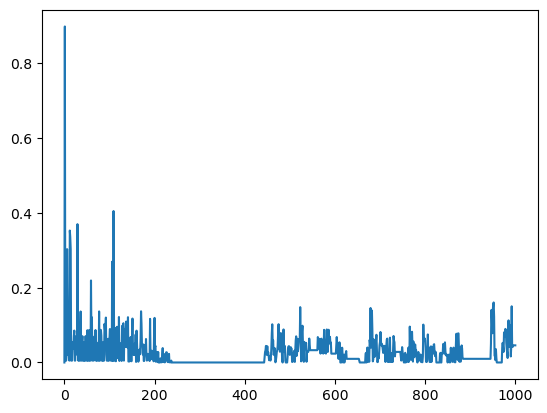

In [7]:
def change_metric(graphs):
    """
    Takes in a list of transaction graphs and returns a list of the change between each
    """
    output = [0]
    for i in range(0, len(graphs)):
        prev = nx.adjacency_matrix(graphs[i-1]).A
        curr = nx.adjacency_matrix(graphs[i]).A
        change = sum(sum(abs(curr - prev)))
        maximum = sum(sum(prev)) + sum(sum(curr))
        output.append(change/maximum)
    return output

our_metric = change_metric(model.graphs[1:])
plt.plot(our_metric)

<AxesSubplot:xlabel='Step'>

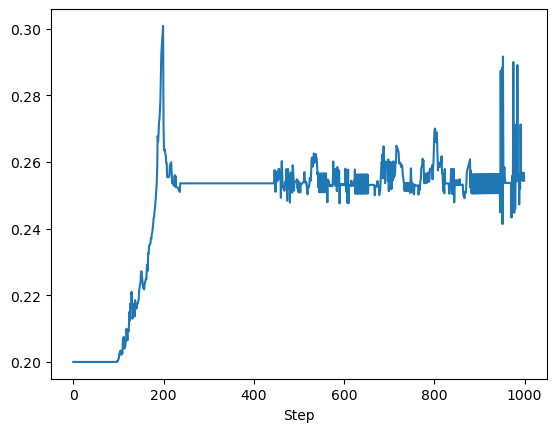

In [8]:
HHI.plot()

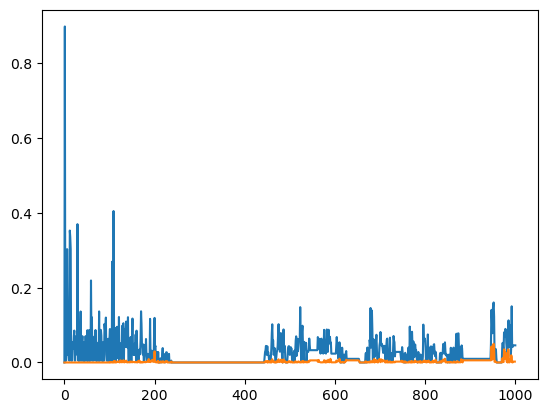

In [9]:
def compute_hhi_diff(hhi):
    hhi_diff = [0]

    for i in range(1, len(hhi)):
        change = abs(hhi[i] - hhi[i-1])
        hhi_diff.append(change)

    return hhi_diff

plt.plot(our_metric)
plt.plot(compute_hhi_diff(HHI))

<AxesSubplot:xlabel='Step', ylabel='budget'>

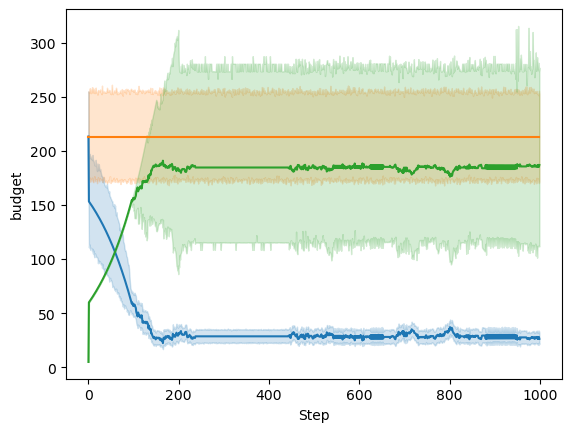

In [10]:
#sns.lineplot(data=df, y='Revenue', x='Step', estimator='sum')
sns.lineplot(data=df, y='budget', x='Step', estimator='sum')
sns.lineplot(data=df, y='Initial_budget', x='Step', estimator='sum')
sns.lineplot(data=df, y='Revenue', x='Step', estimator='sum')


<AxesSubplot:xlabel='Step', ylabel='Quality'>

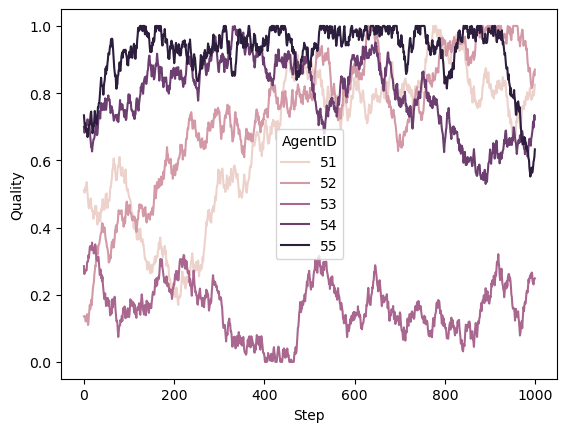

In [11]:
sns.lineplot(data=df_firm, y='Quality', x='Step', hue = 'AgentID')

<AxesSubplot:xlabel='Step', ylabel='Price'>

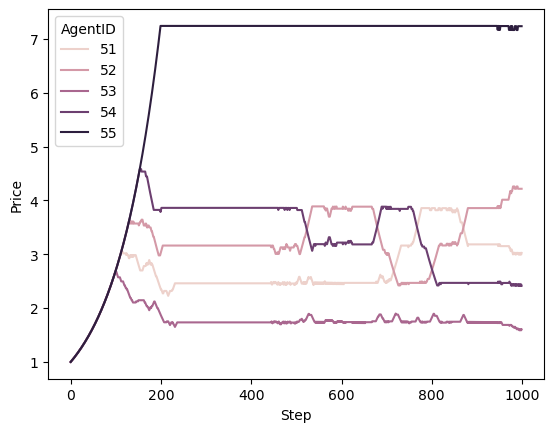

In [12]:
sns.lineplot(data=df_firm, y='Price', x='Step', hue = 'AgentID')

<AxesSubplot:xlabel='Step', ylabel='Quantity_sold'>

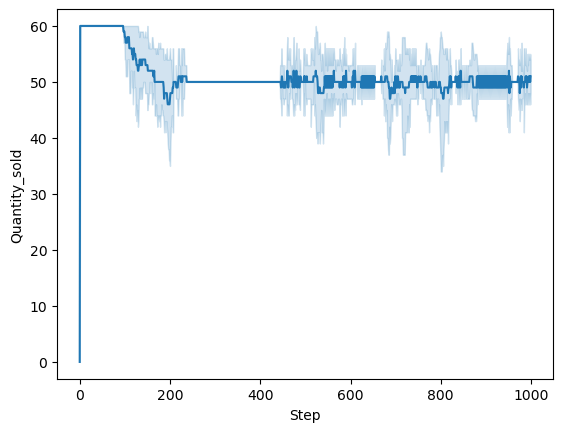

In [13]:
sns.lineplot(data=df, y='Quantity_sold', x='Step', estimator='sum')


<AxesSubplot:xlabel='Step', ylabel='Revenue'>

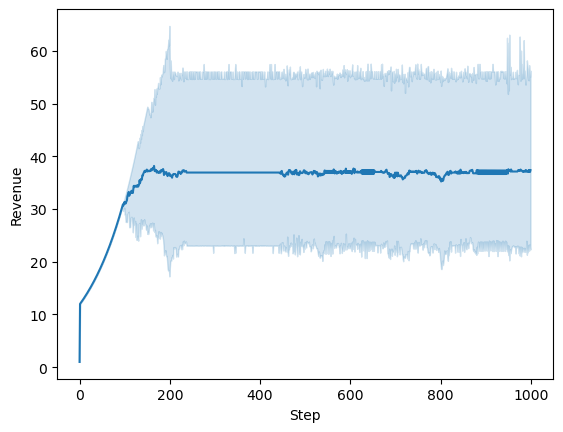

In [14]:
sns.lineplot(data=df, y='Revenue', x='Step')


<AxesSubplot:>

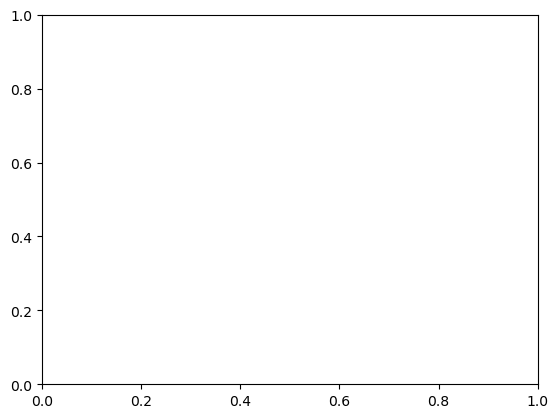

In [15]:
sns.lineplot(data=df.loc[df['AgentID'] == 1020],
             y='Revenue', x='Step', hue='AgentID')


In [16]:
df.loc[(df['Step'] == 0) & (df['Type'] == 'Household')].sort_values('budget')


Step  AgentID       Type  Quality  Revenue  Quantity_sold  Price  \
42     0       43  Household      NaN      NaN            NaN    NaN   
29     0       30  Household      NaN      NaN            NaN    NaN   
16     0       17  Household      NaN      NaN            NaN    NaN   
23     0       24  Household      NaN      NaN            NaN    NaN   
4      0        5  Household      NaN      NaN            NaN    NaN   
7      0        8  Household      NaN      NaN            NaN    NaN   
20     0       21  Household      NaN      NaN            NaN    NaN   
8      0        9  Household      NaN      NaN            NaN    NaN   
35     0       36  Household      NaN      NaN            NaN    NaN   
47     0       48  Household      NaN      NaN            NaN    NaN   
34     0       35  Household      NaN      NaN            NaN    NaN   
28     0       29  Household      NaN      NaN            NaN    NaN   
45     0       46  Household      NaN      NaN            NaN    NaN   
22     0       23  Household      NaN      NaN            NaN    NaN   
14     0       15  Household      NaN      NaN            NaN    NaN   
27     0       28  Household      NaN      NaN            NaN    NaN   
38     0       39  Household      NaN      NaN            NaN    NaN   
6      0        7  Household      NaN      NaN            NaN    NaN   
13     0       14  Household      NaN      NaN            NaN    NaN   
24     0       25  Household      NaN      NaN            NaN    NaN   
44     0       45  Household      NaN      NaN            NaN    NaN   
11     0       12  Household      NaN      NaN            NaN    NaN   
36     0       37  Household      NaN      NaN            NaN    NaN   
2      0        3  Household      NaN      NaN            NaN    NaN   
9      0       10  Household      NaN      NaN            NaN    NaN   
18     0       19  Household      NaN      NaN            NaN    NaN   
30     0       31  Household      NaN      NaN            NaN    NaN   
33     0       34  Household      NaN      NaN            NaN    NaN   
21     0       22  Household      NaN      NaN            NaN    NaN   
10     0       11  Household      NaN      NaN            NaN    NaN   
17     0       18  Household      NaN      NaN            NaN    NaN   
19     0       20  Household      NaN      NaN            NaN    NaN   
15     0       16  Household      NaN      NaN            NaN    NaN   
5      0        6  Household      NaN      NaN            NaN    NaN   
46     0       47  Household      NaN      NaN            NaN    NaN   
32     0       33  Household      NaN      NaN            NaN    NaN   
26     0       27  Household      NaN      NaN            NaN    NaN   
49     0       50  Household      NaN      NaN            NaN    NaN   
39     0       40  Household      NaN      NaN            NaN    NaN   
12     0       13  Household      NaN      NaN            NaN    NaN   
43     0       44  Household      NaN      NaN            NaN    NaN   
37     0       38  Household      NaN      NaN            NaN    NaN   
1      0        2  Household      NaN      NaN            NaN    NaN   
40     0       41  Household      NaN      NaN            NaN    NaN   
3      0        4  Household      NaN      NaN            NaN    NaN   
48     0       49  Household      NaN      NaN            NaN    NaN   
41     0       42  Household      NaN      NaN            NaN    NaN   
25     0       26  Household      NaN      NaN            NaN    NaN   
31     0       32  Household      NaN      NaN            NaN    NaN   
0      0        1  Household      NaN      NaN            NaN    NaN   

    Initial_budget    budget  
42        0.187107  0.187107  
29        0.308576  0.308576  
16        0.311404  0.311404  
23        0.373528  0.373528  
4         0.425470  0.425470  
7         0.478644  0.478644  
20        0.752916  0.752916  
8         0.979148  0.979148  
35        1.032354  1.032354  
47        1.110585  1

In [17]:
df.loc[(df['Step'] == 0) & (df['Type'] == 'Firm')].sort_values('Quality')


Step  AgentID  Type   Quality  Revenue  Quantity_sold  Price  \
51     0       52  Firm  0.136001      1.0            0.0    1.0   
52     0       53  Firm  0.285060      1.0            0.0    1.0   
50     0       51  Firm  0.511155      1.0            0.0    1.0   
53     0       54  Firm  0.699500      1.0            0.0    1.0   
54     0       55  Firm  0.733901      1.0            0.0    1.0   

    Initial_budget  budget  
51             NaN     NaN  
52             NaN     NaN  
50             NaN     NaN  
53             NaN     NaN  
54             NaN     NaN

<AxesSubplot:xlabel='AgentID', ylabel='Quality'>

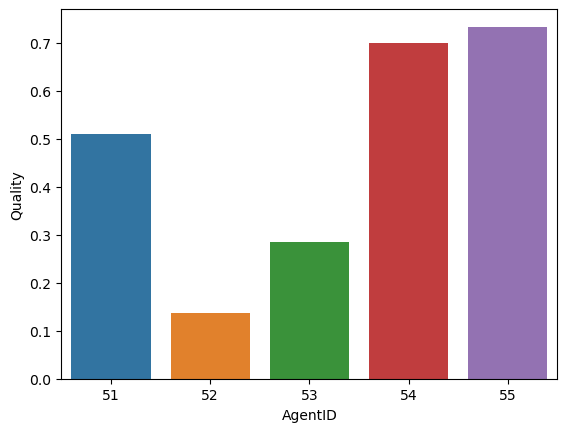

In [18]:
sns.barplot(data=df.loc[(df['Step'] == 0) & (
    df['Type'] == 'Firm')], y='Quality', x='AgentID')


In [19]:
df.loc[df['AgentID'] == 1009]


Empty DataFrame
Columns: [Step, AgentID, Type, Quality, Revenue, Quantity_sold, Price, Initial_budget, budget]
Index: []

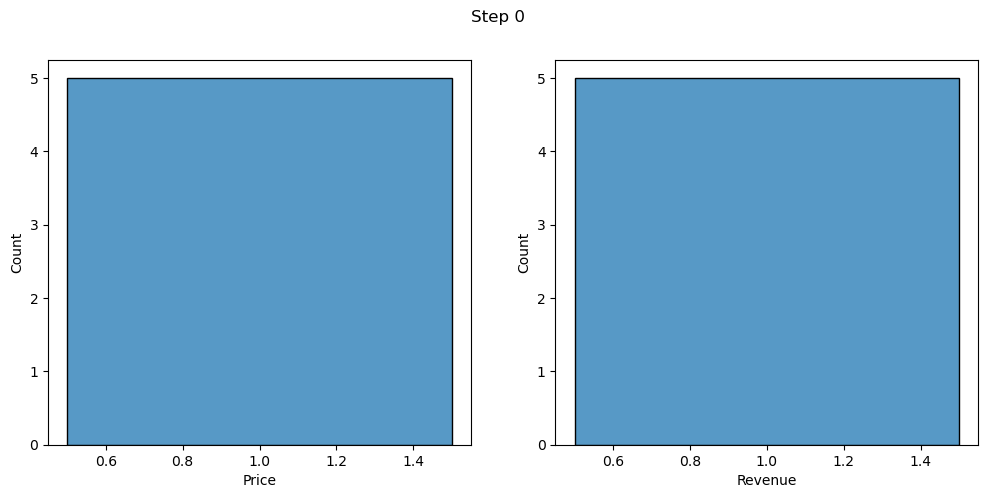

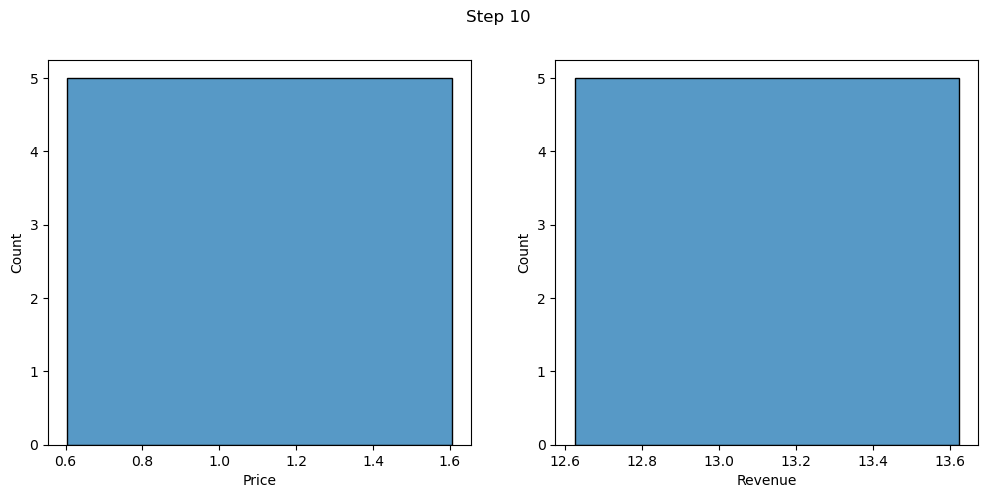

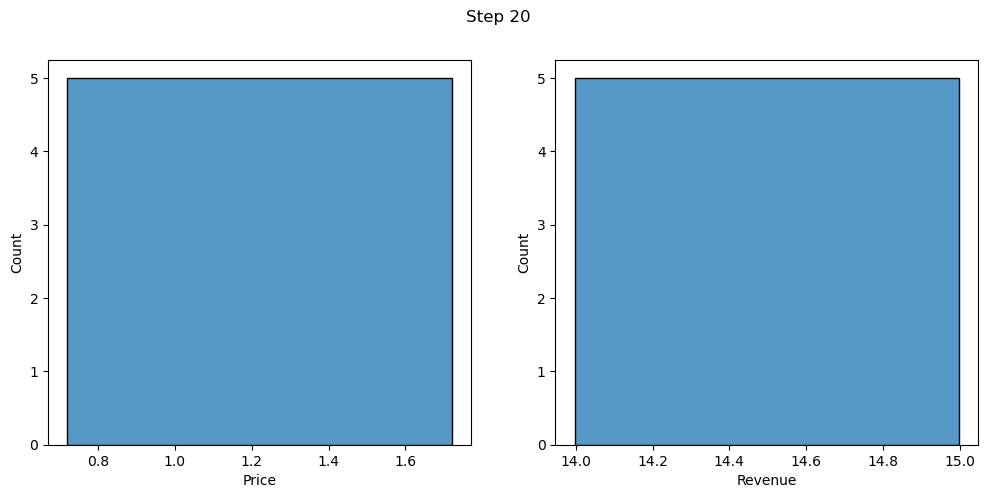

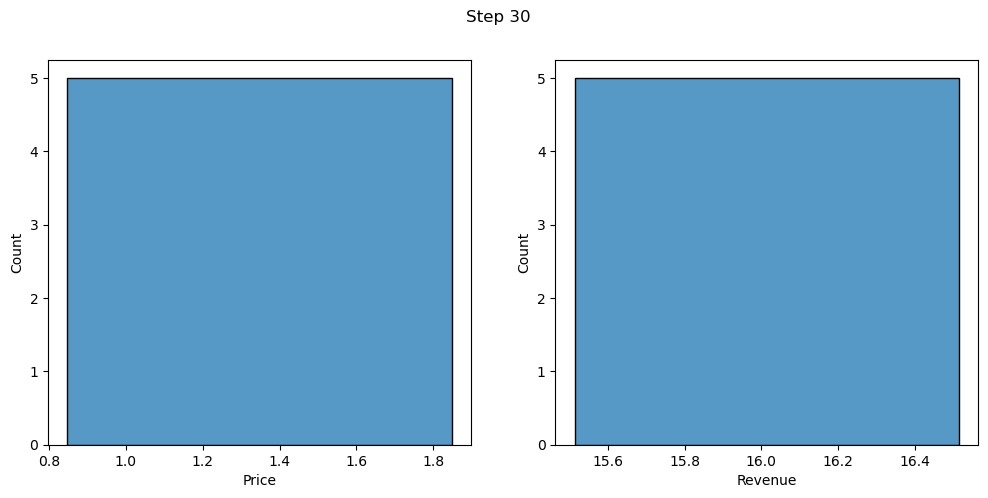

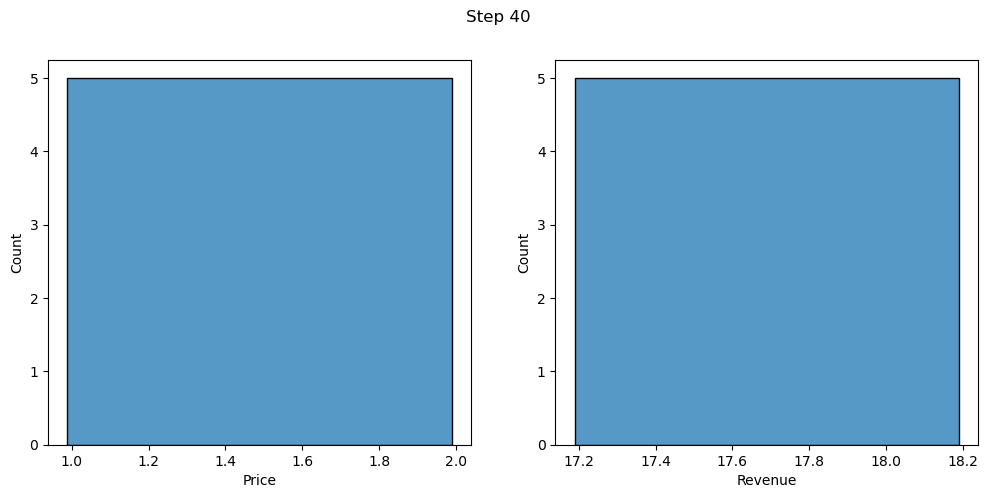

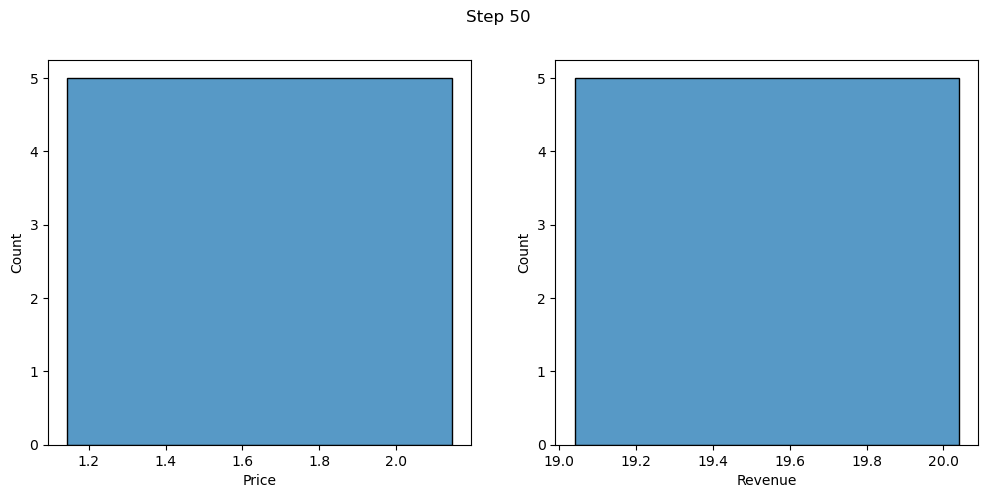

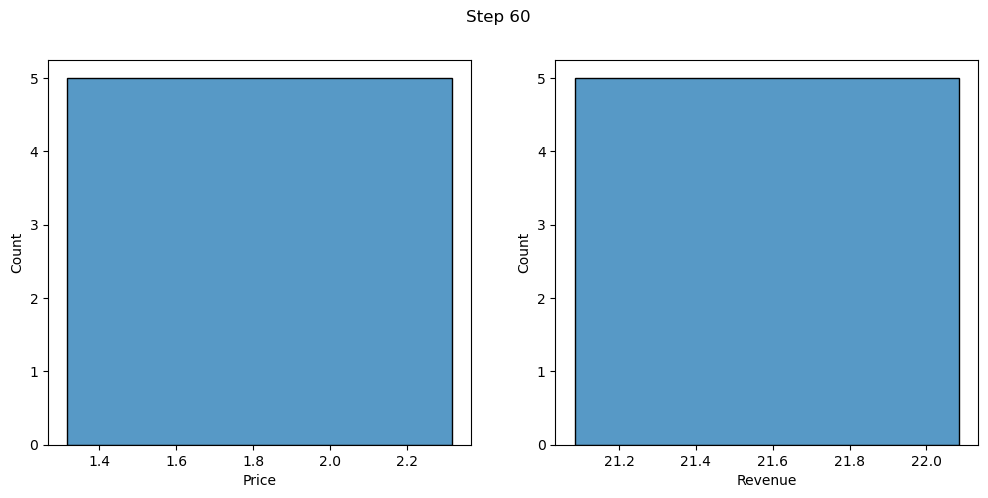

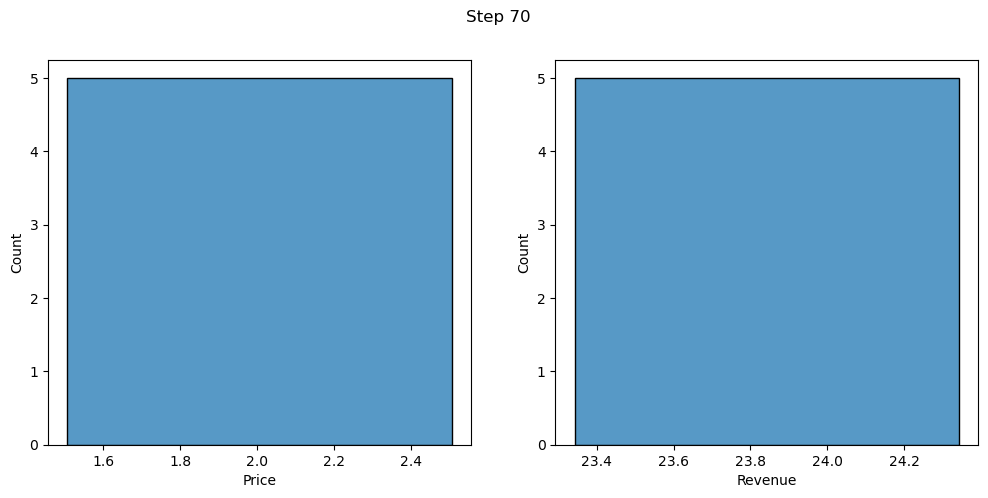

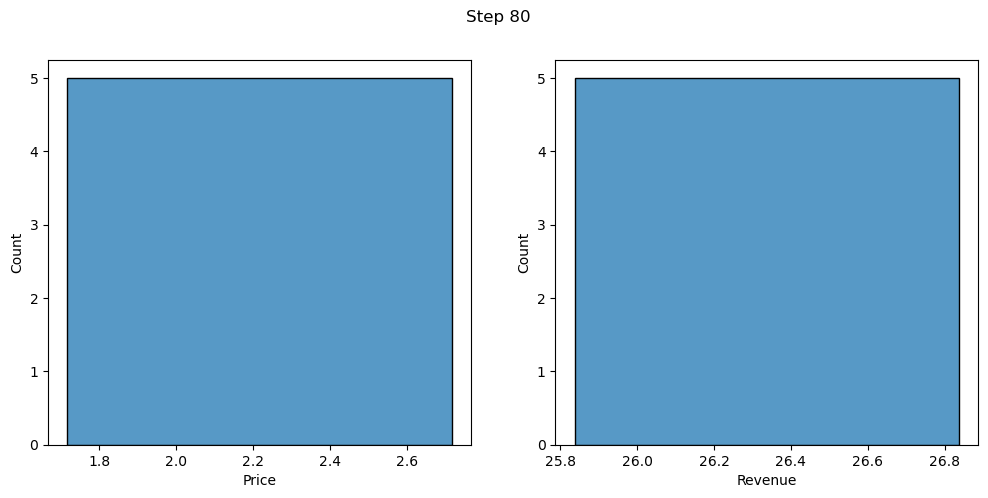

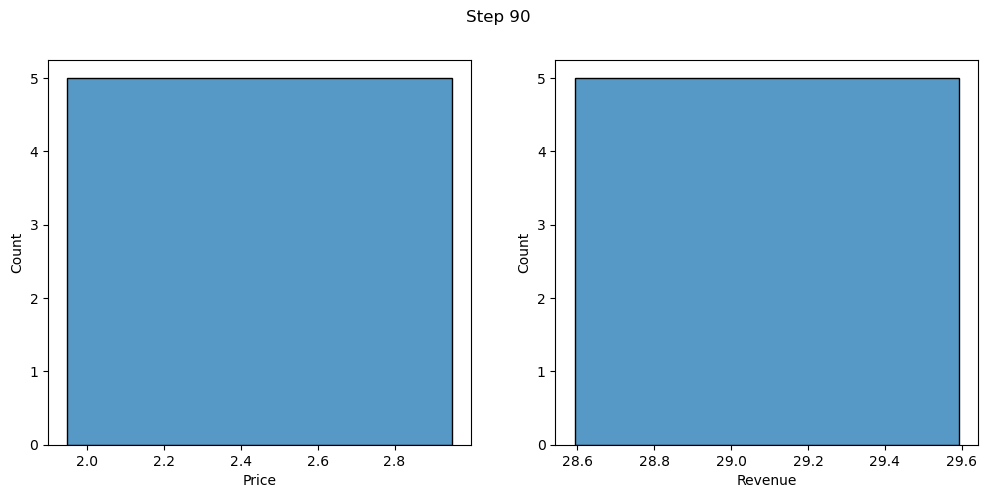

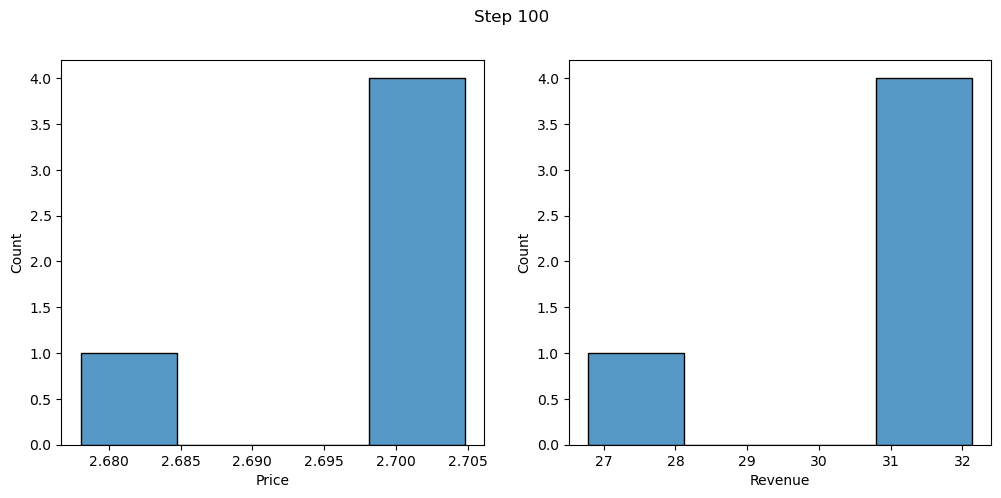

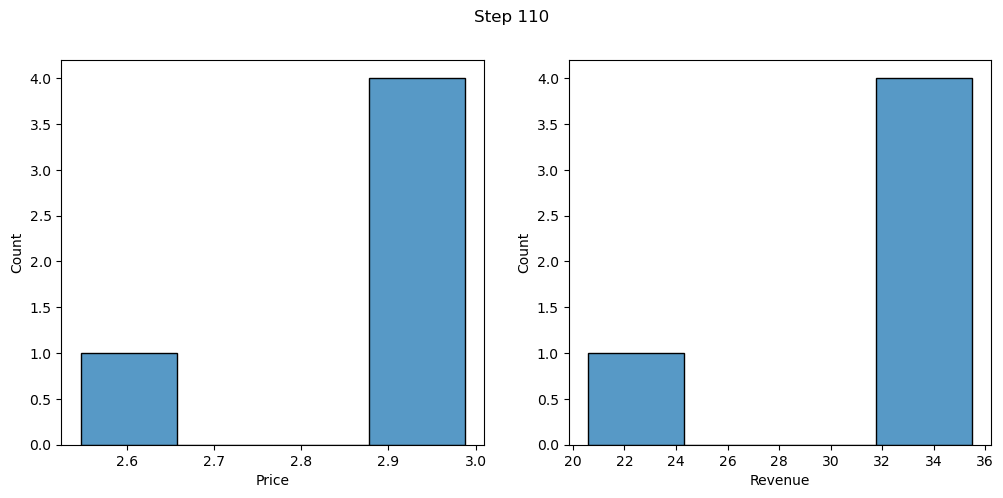

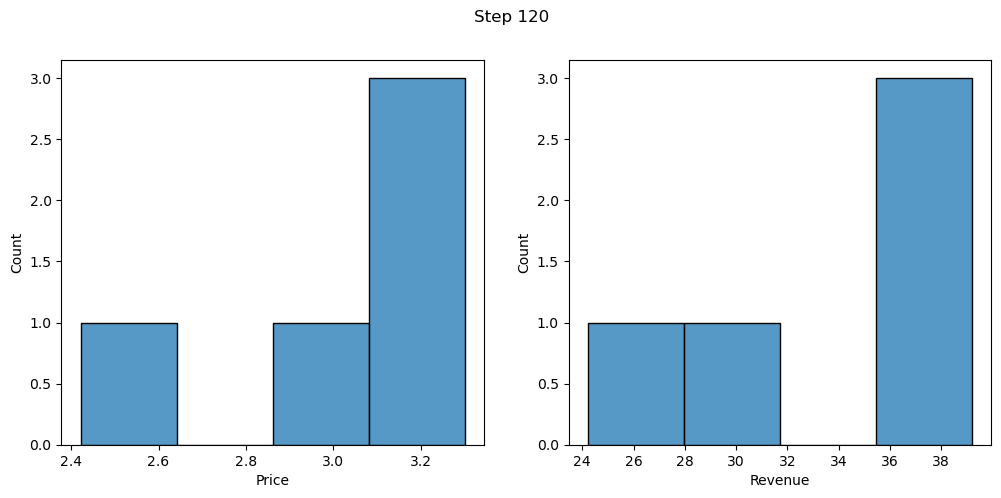

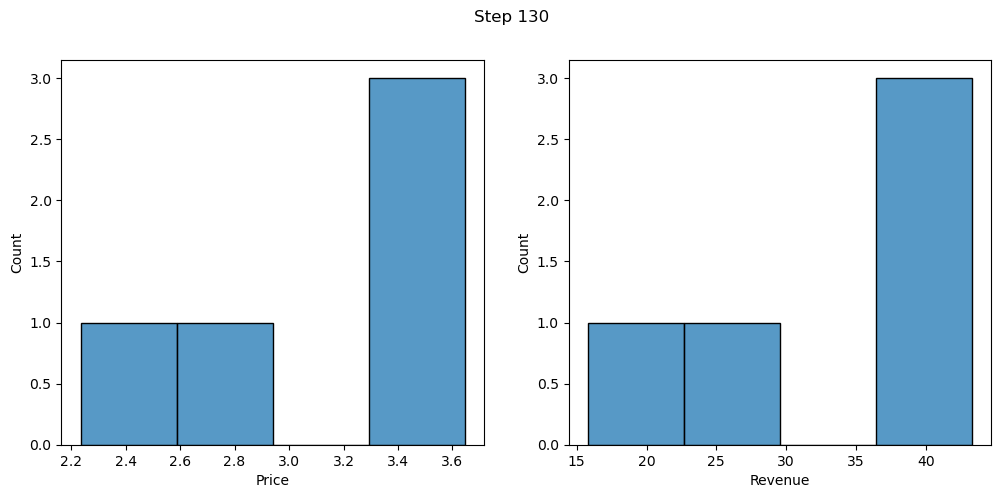

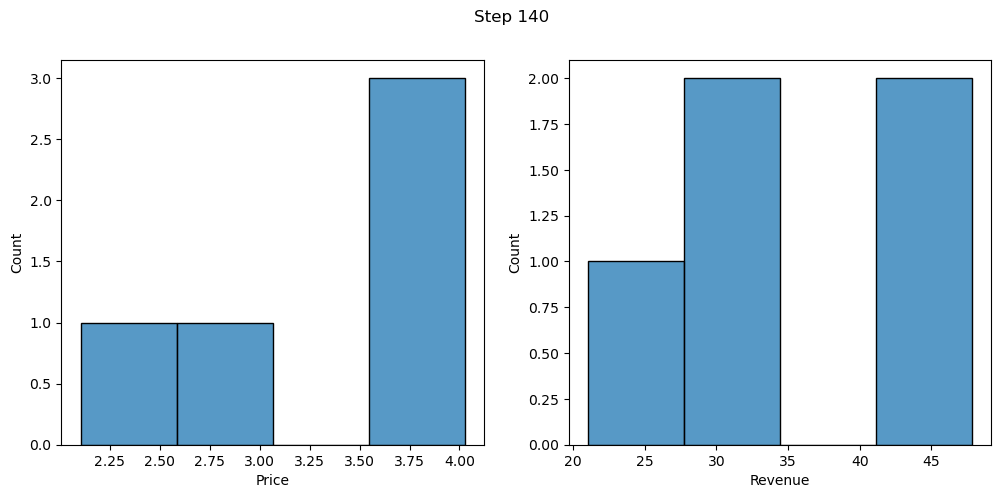

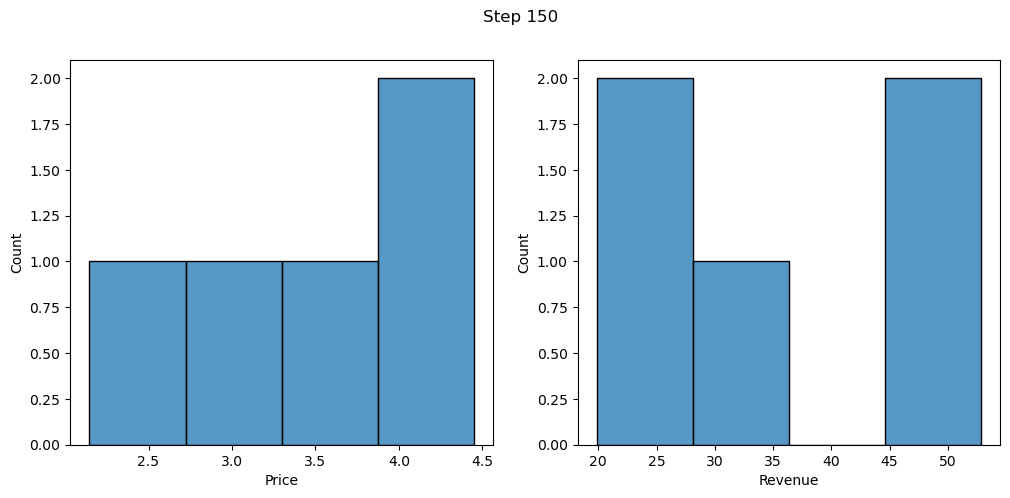

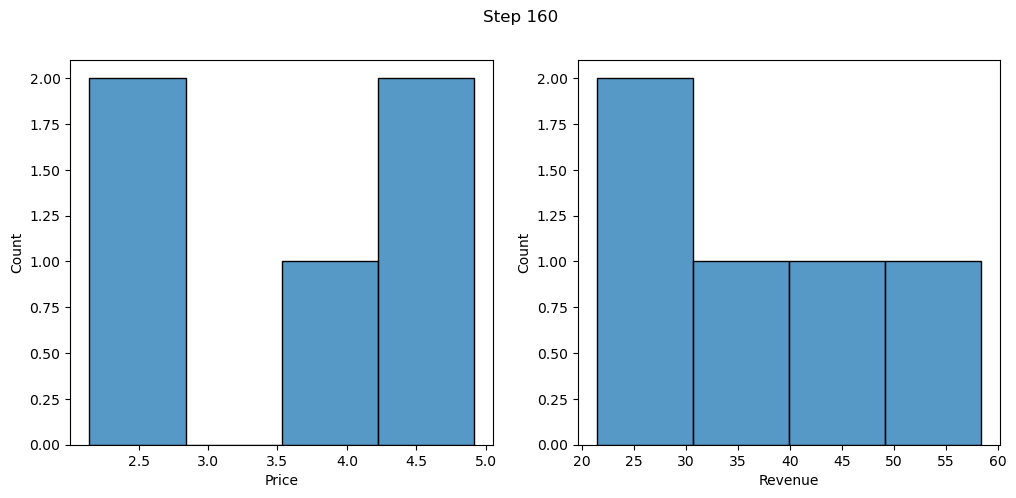

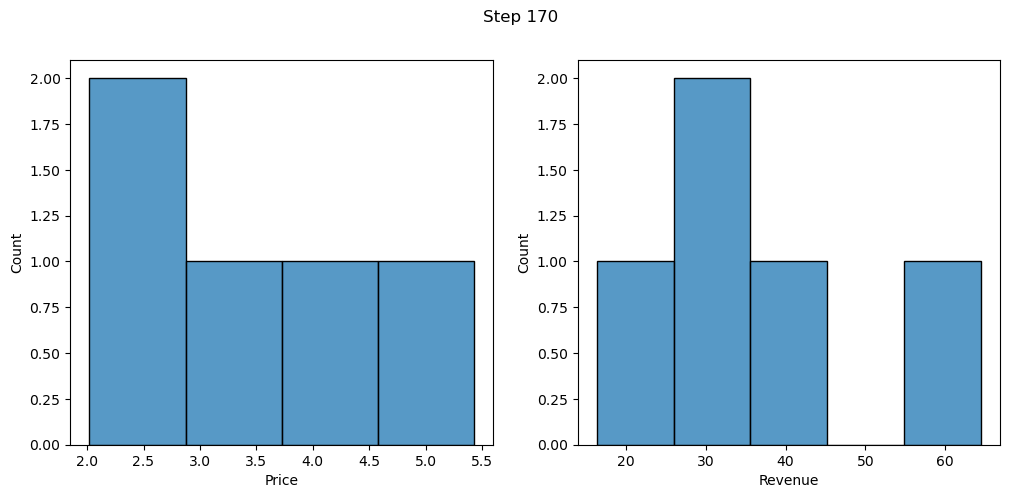

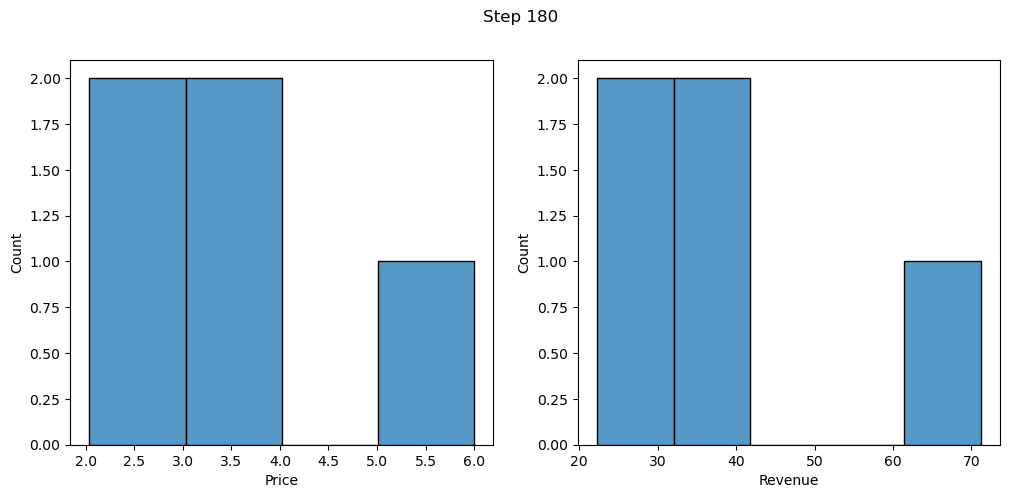

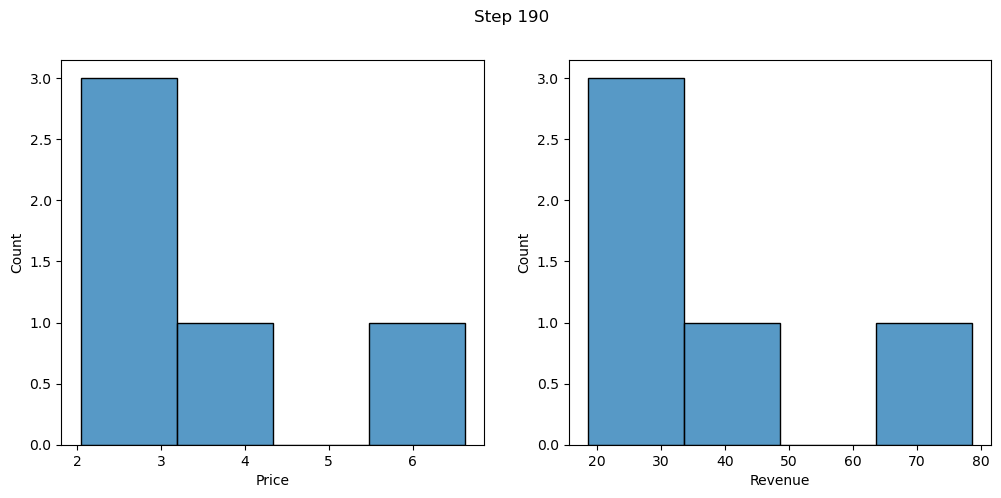

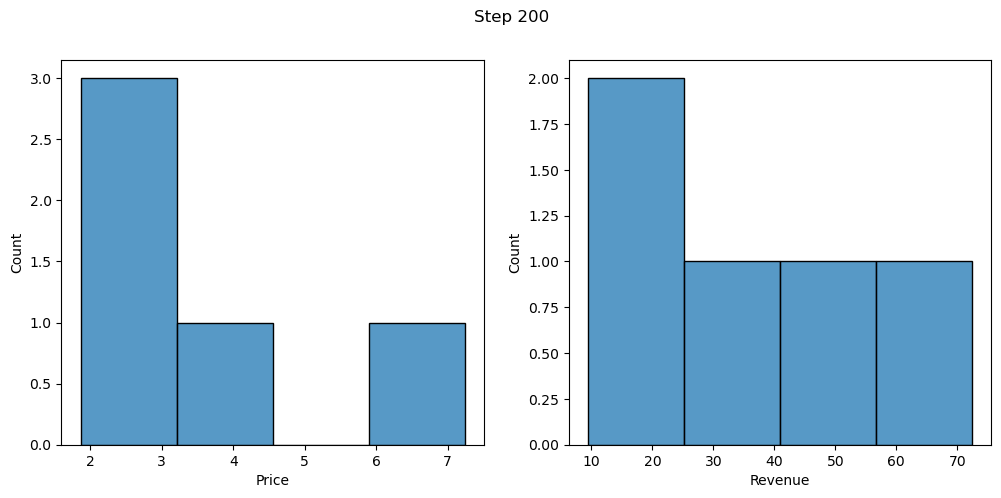

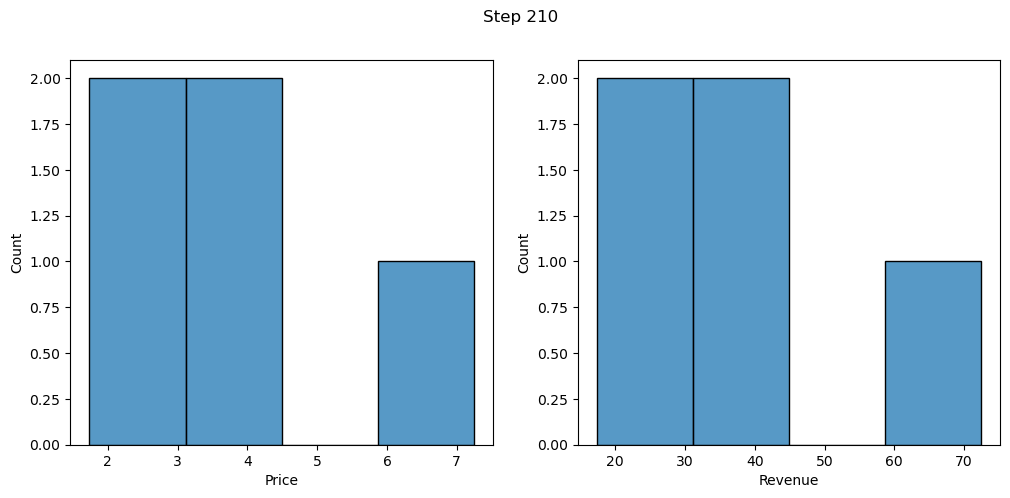

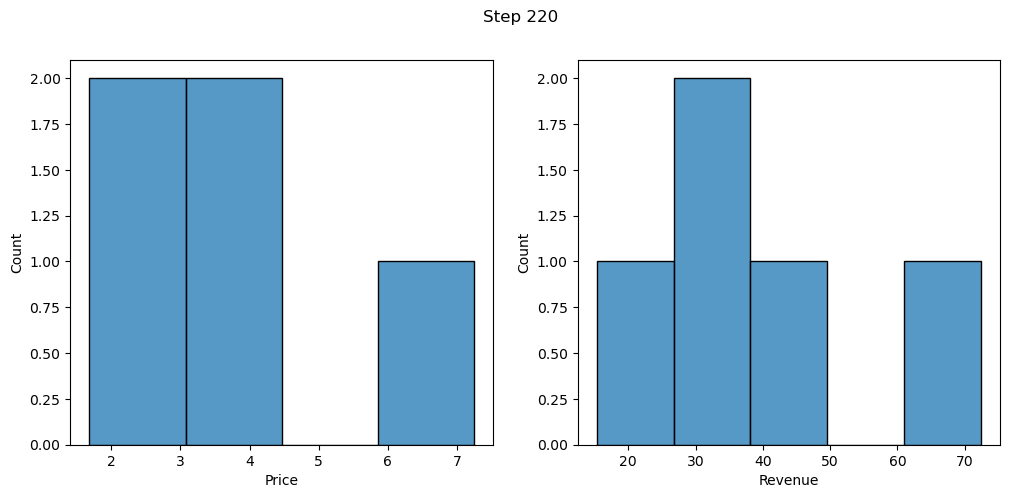

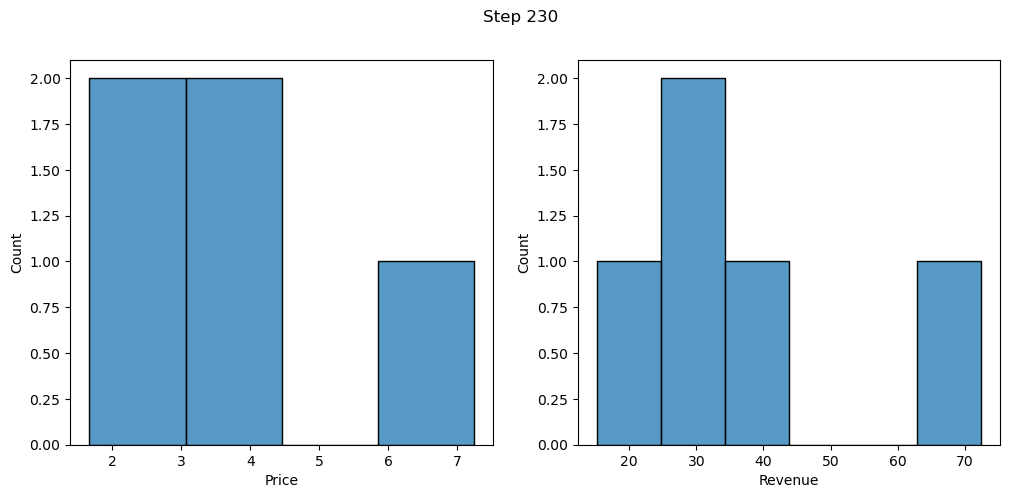

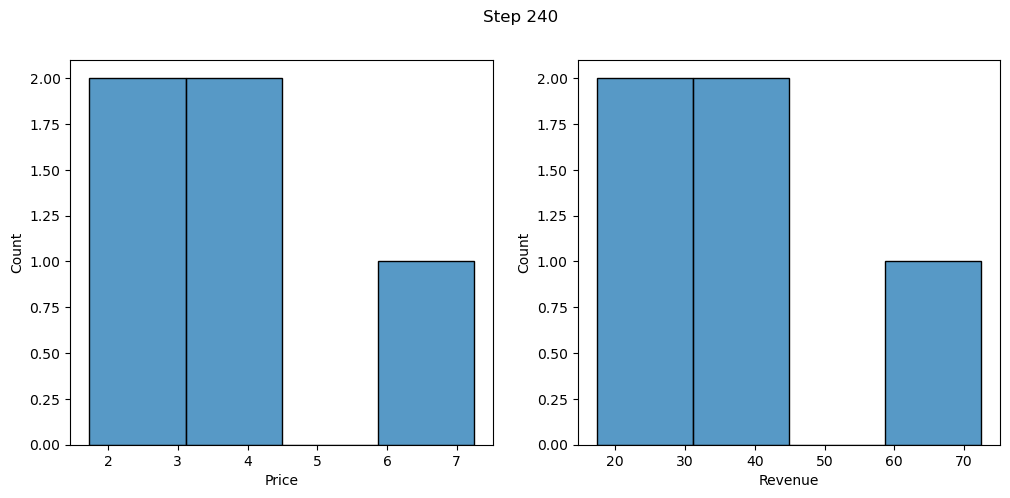

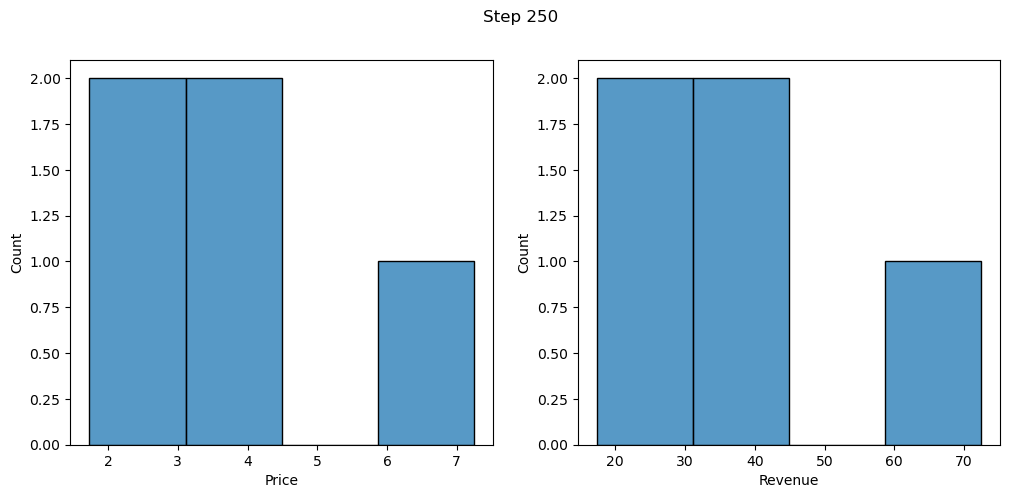

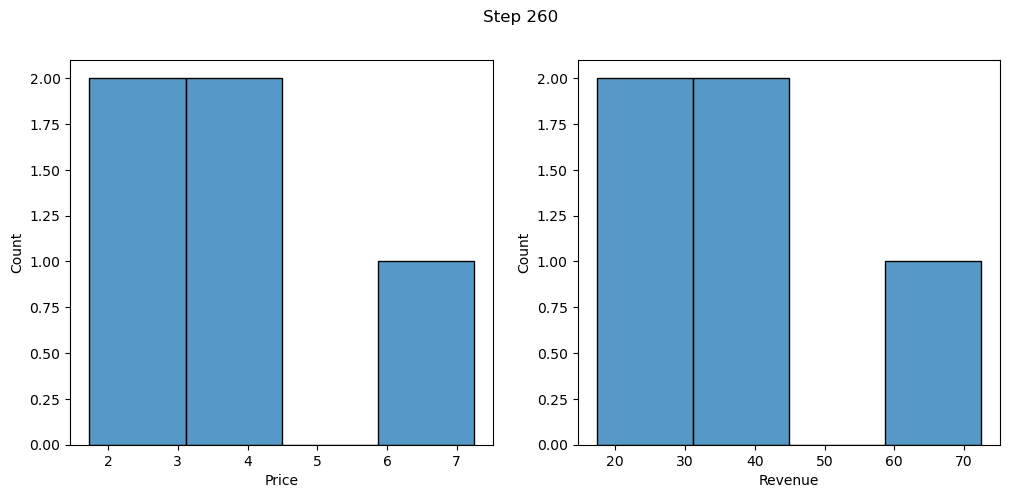

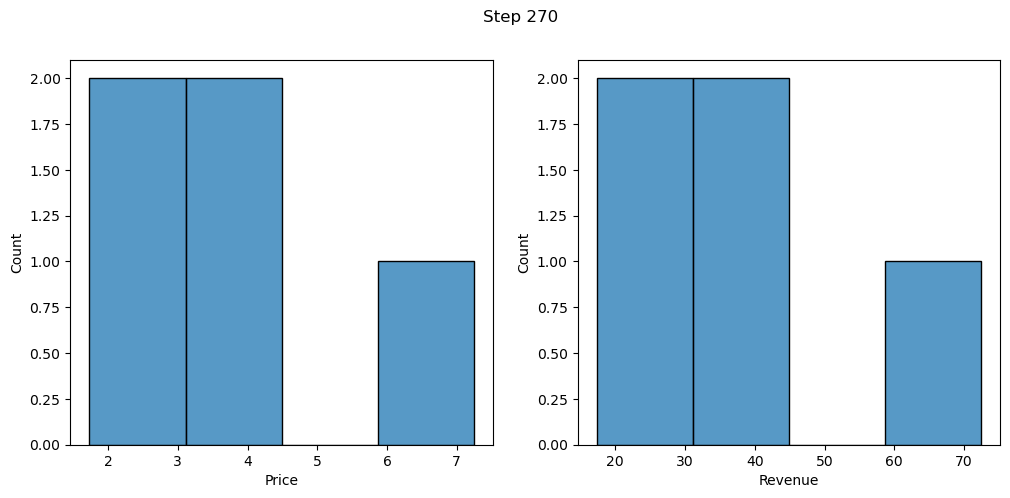

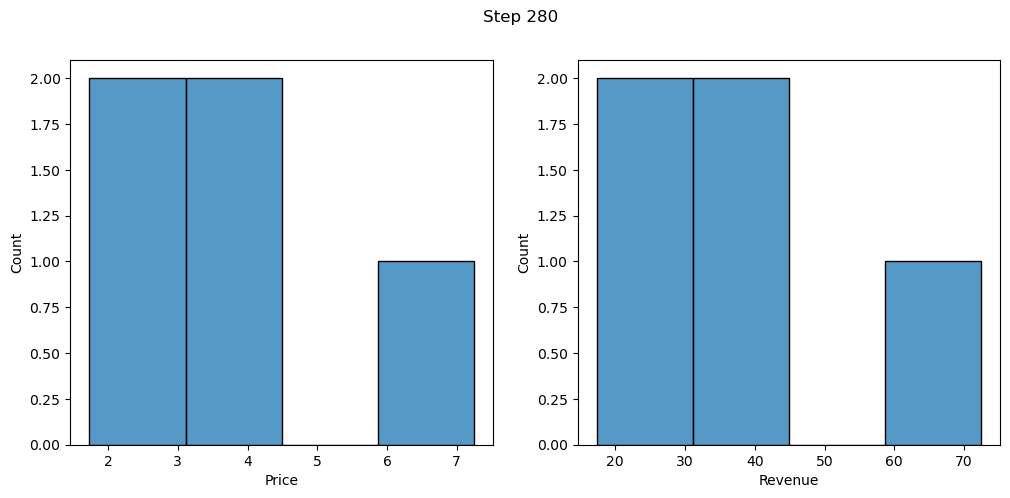

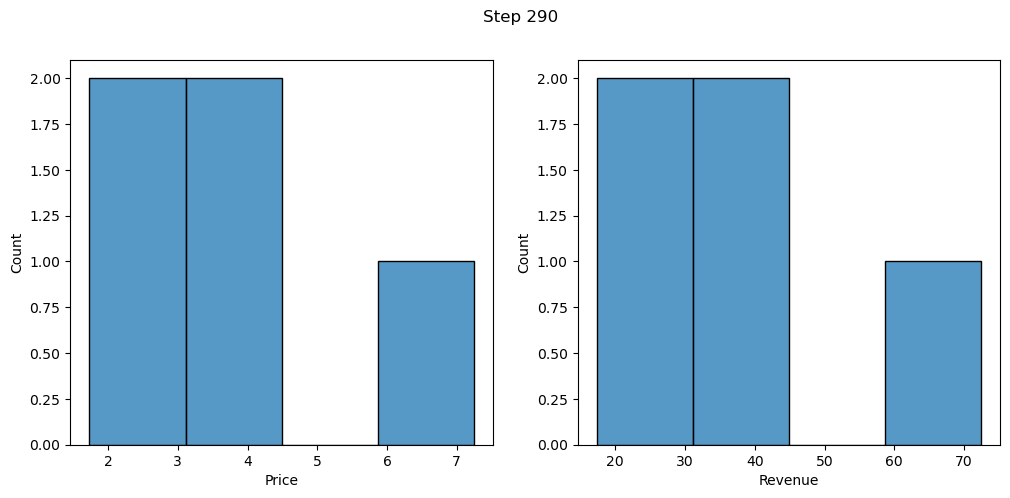

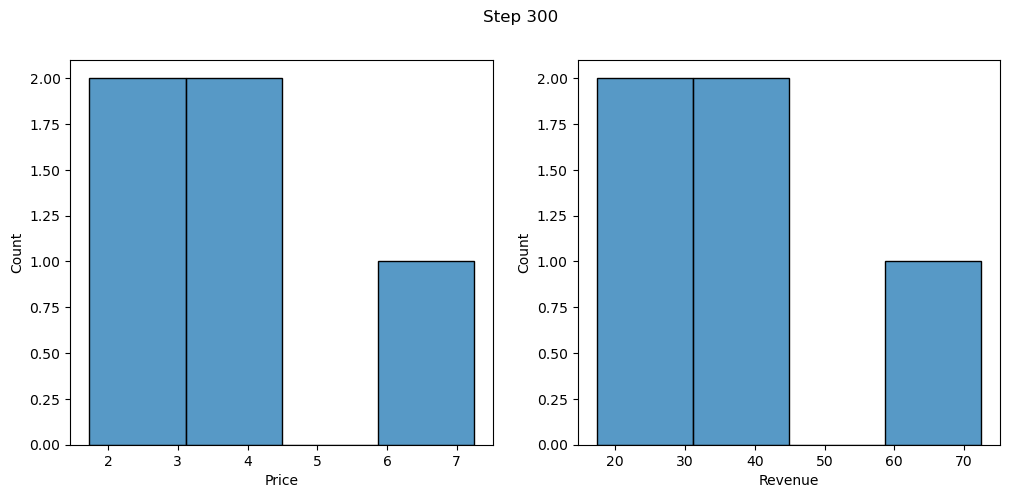

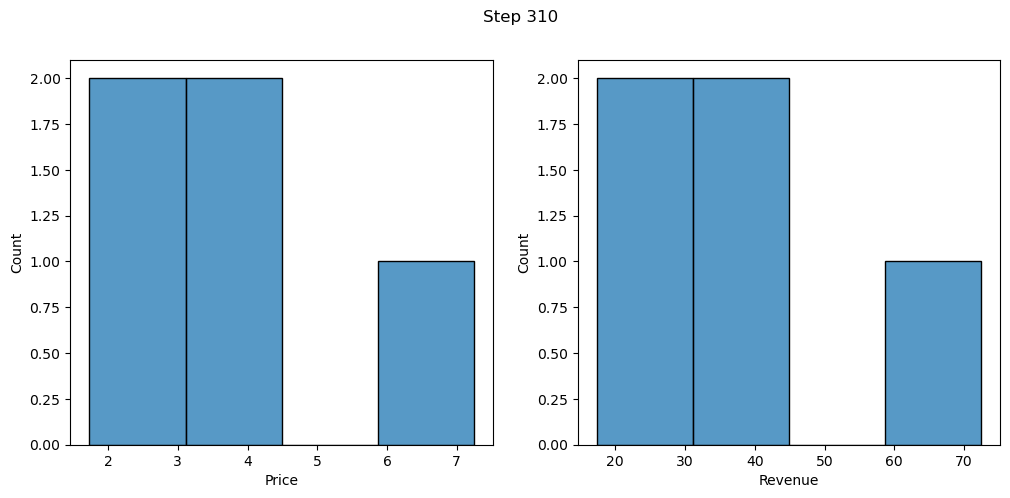

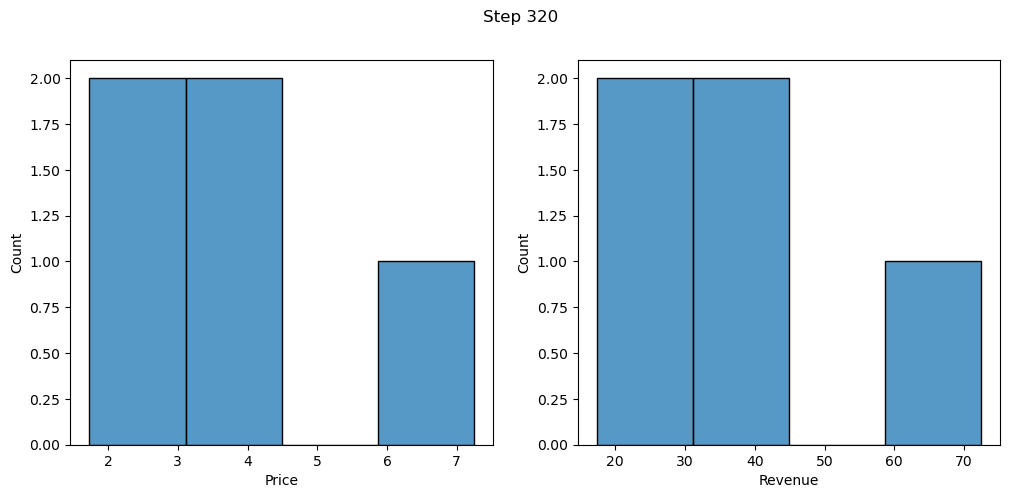

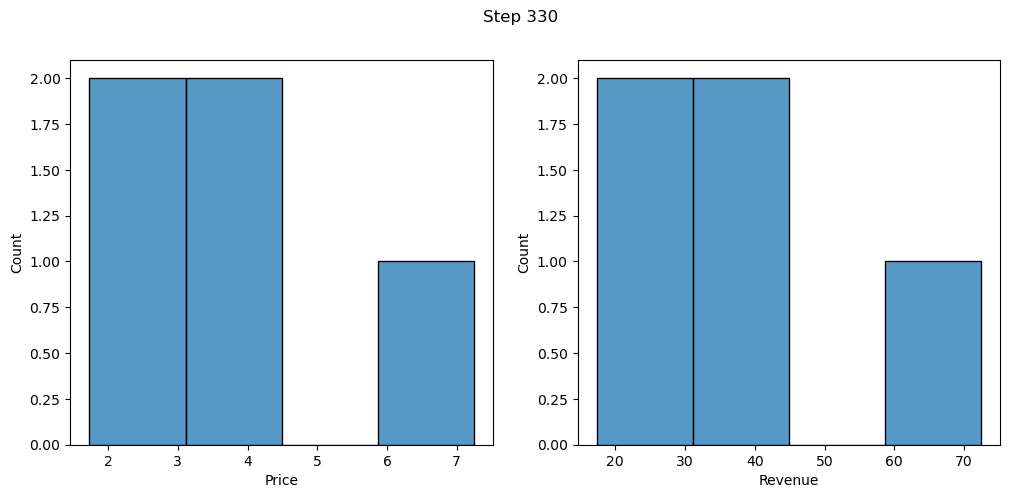

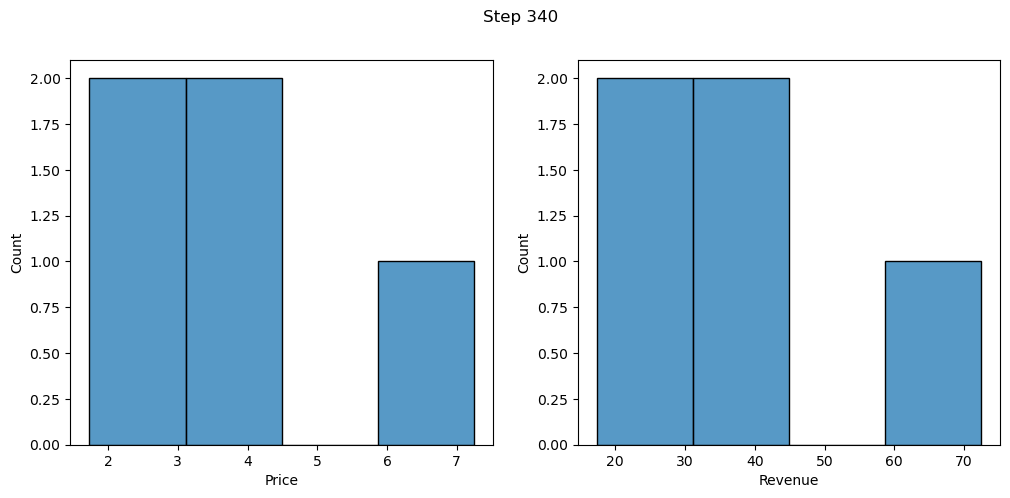

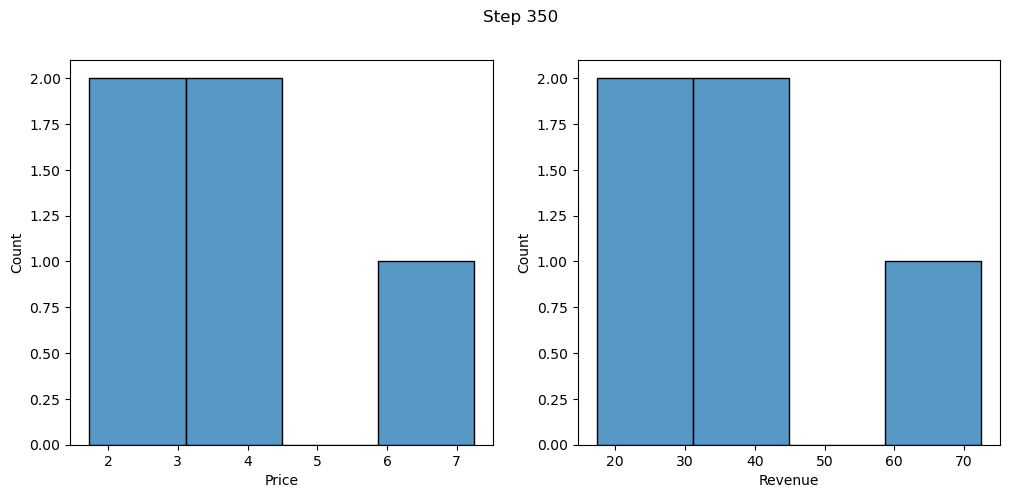

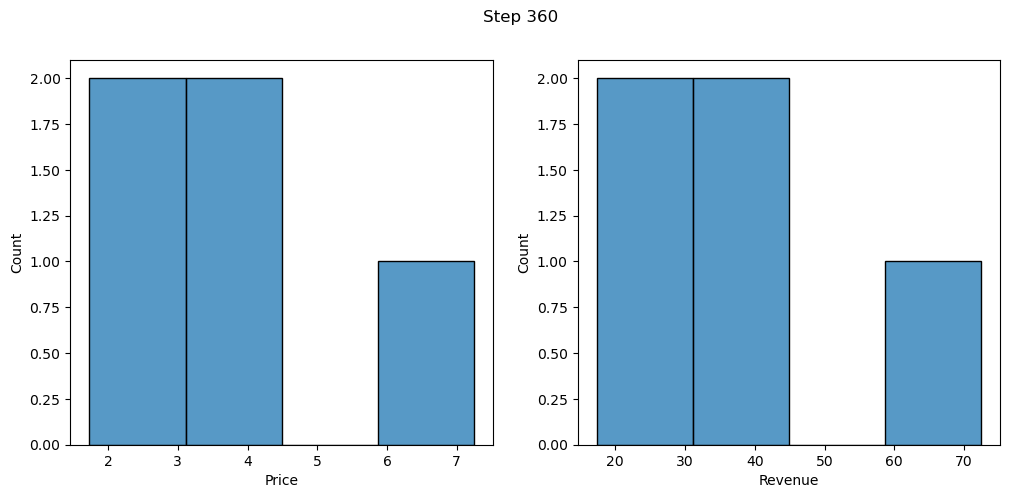

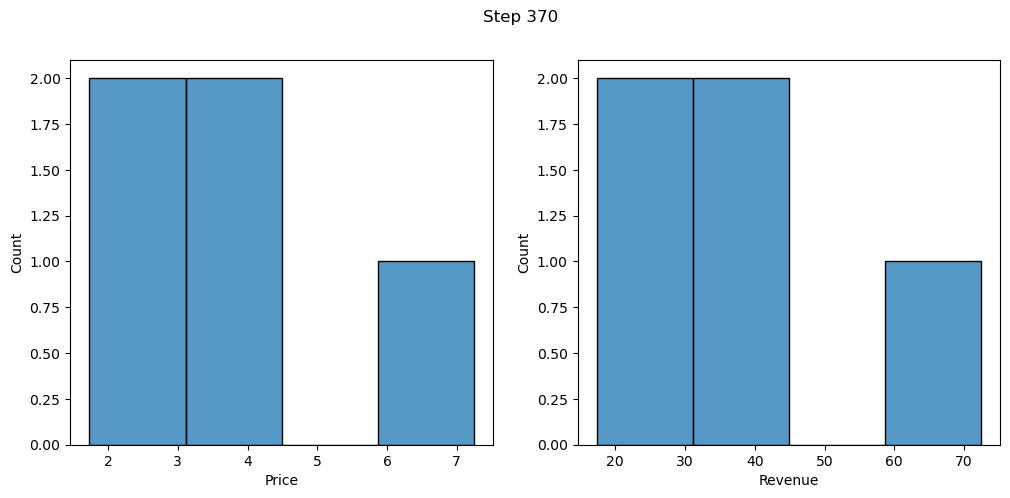

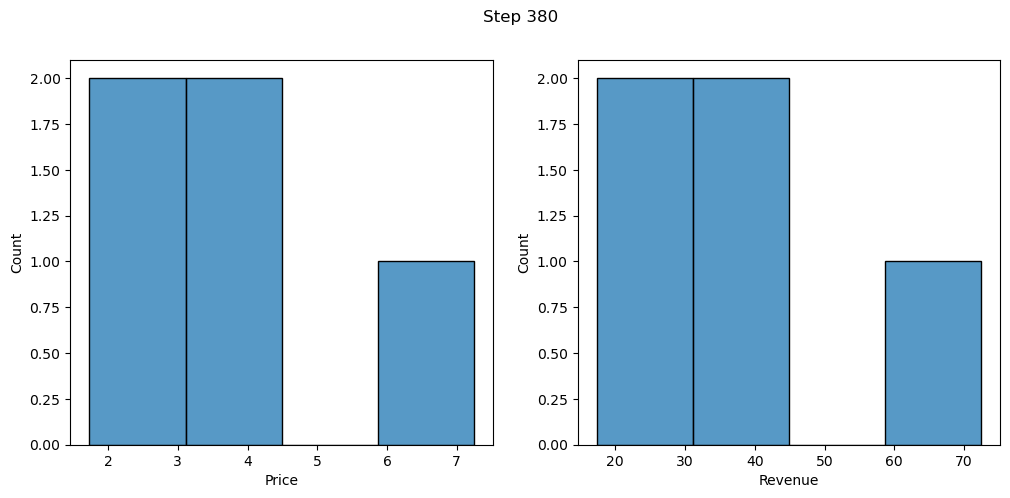

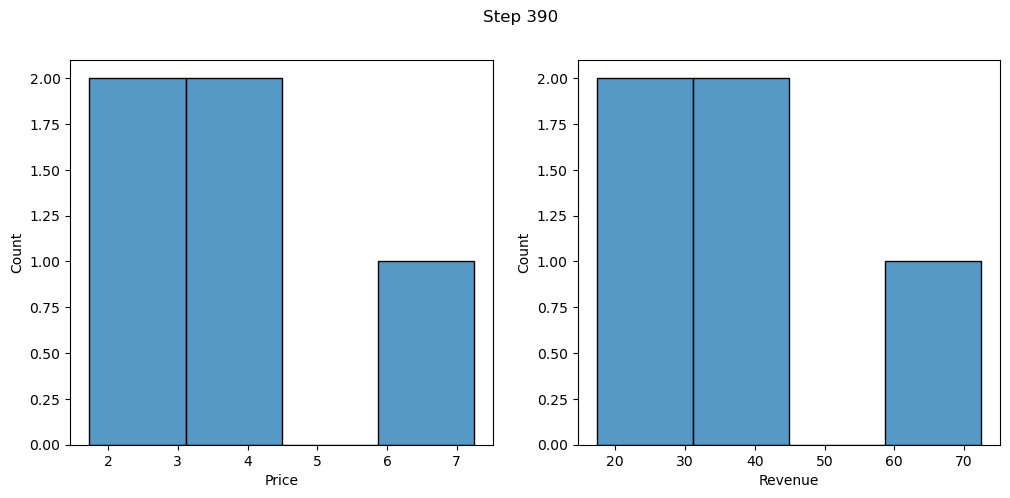

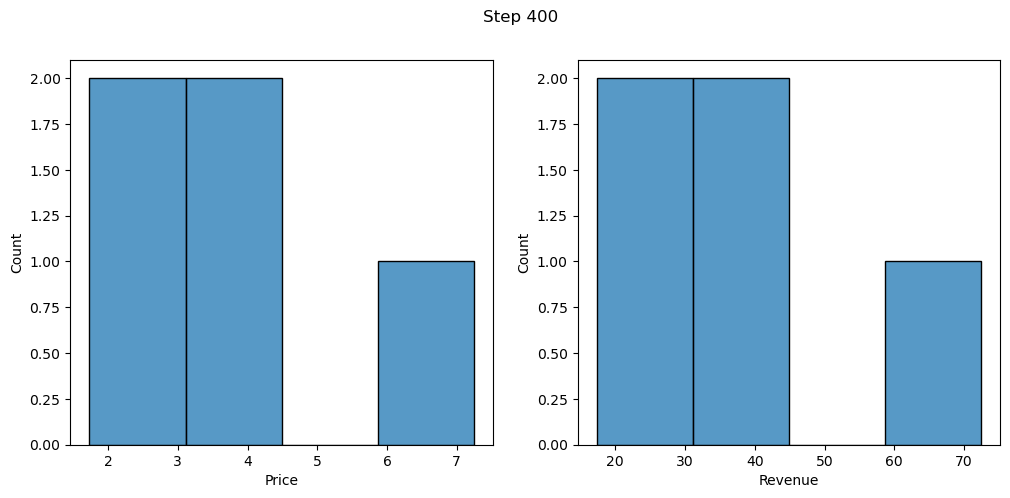

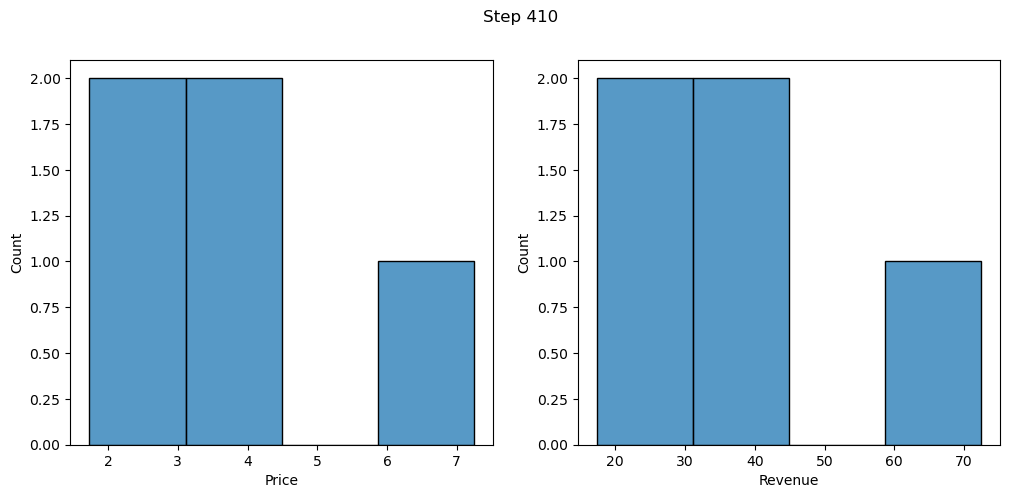

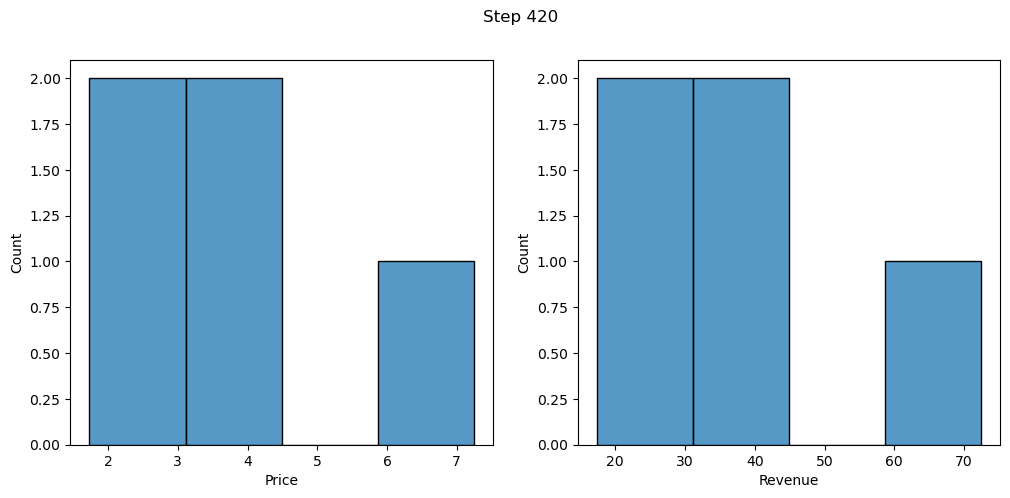

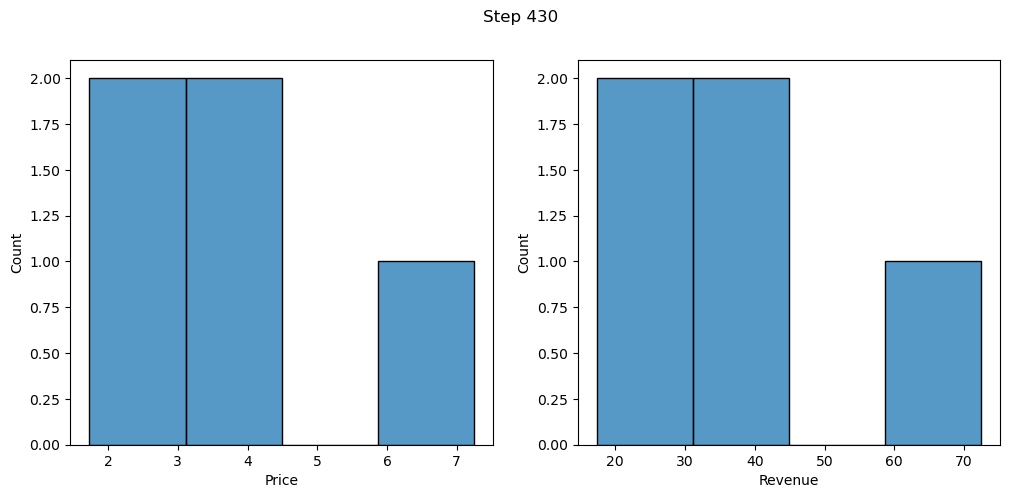

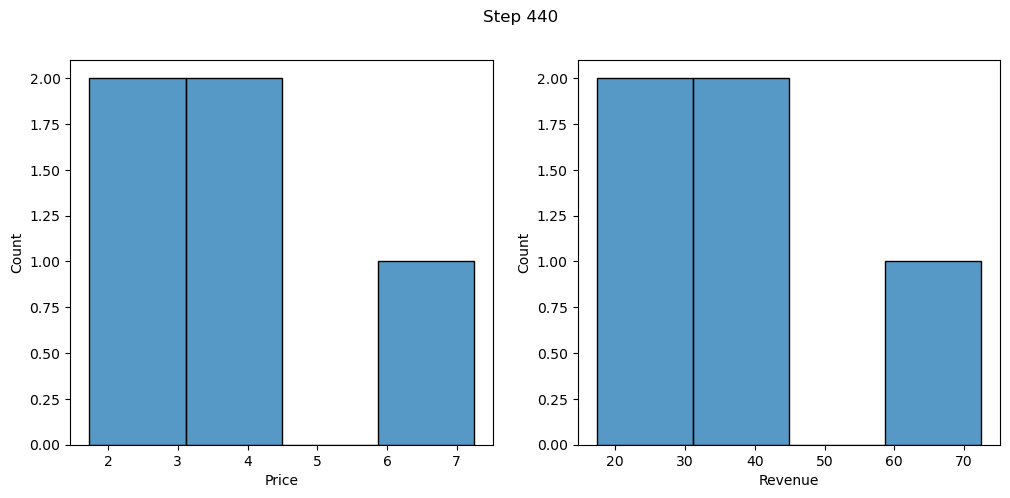

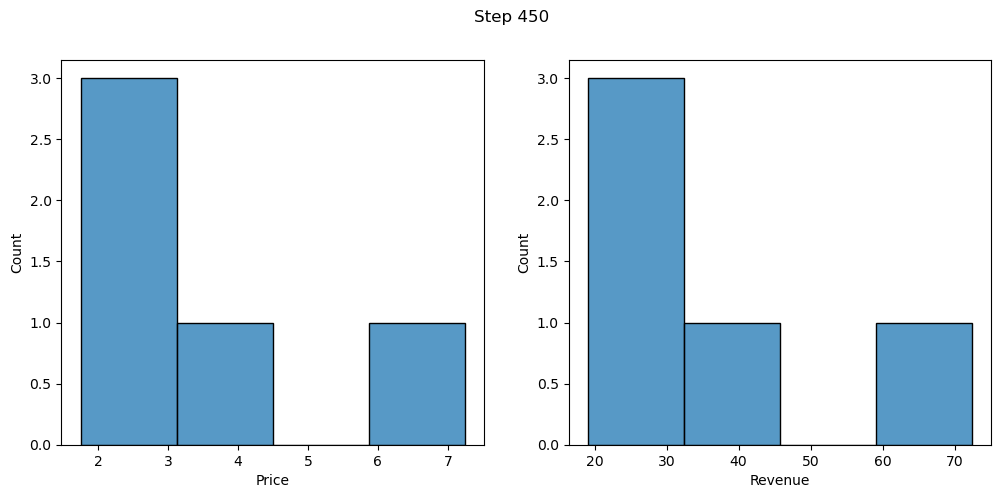

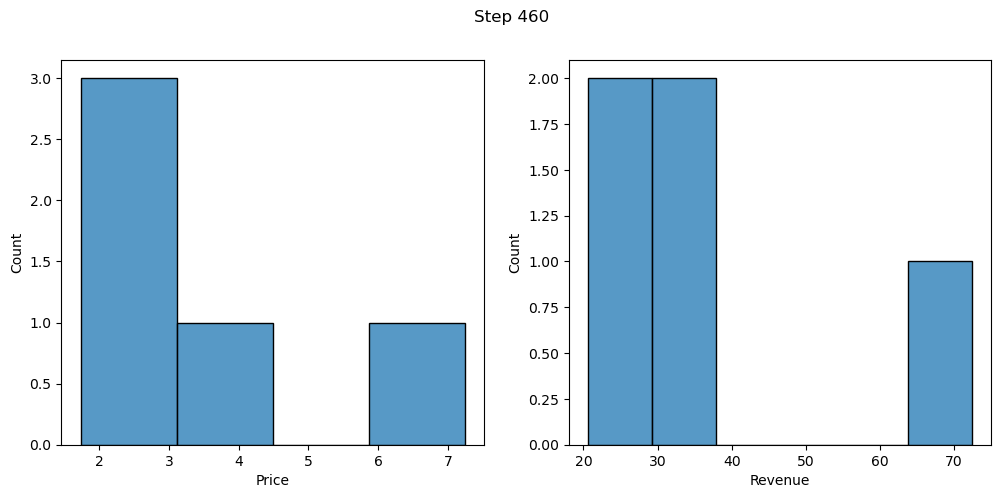

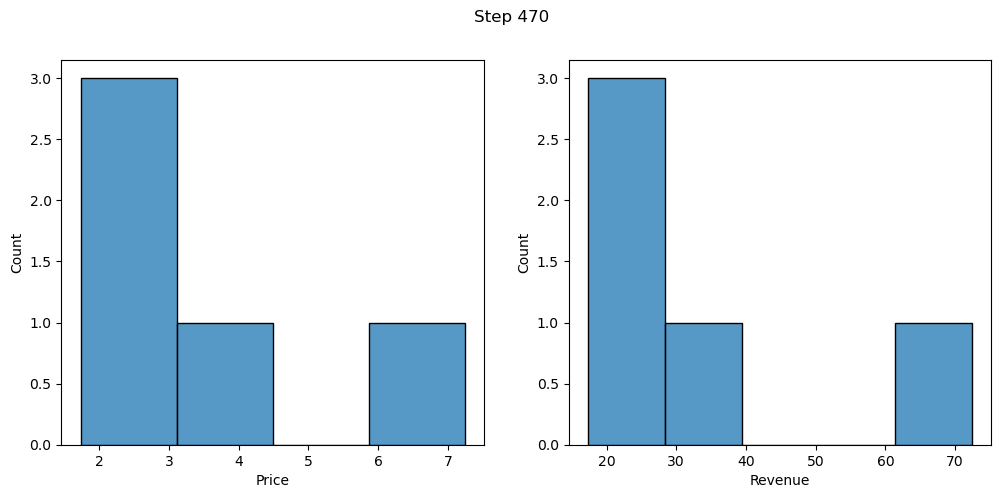

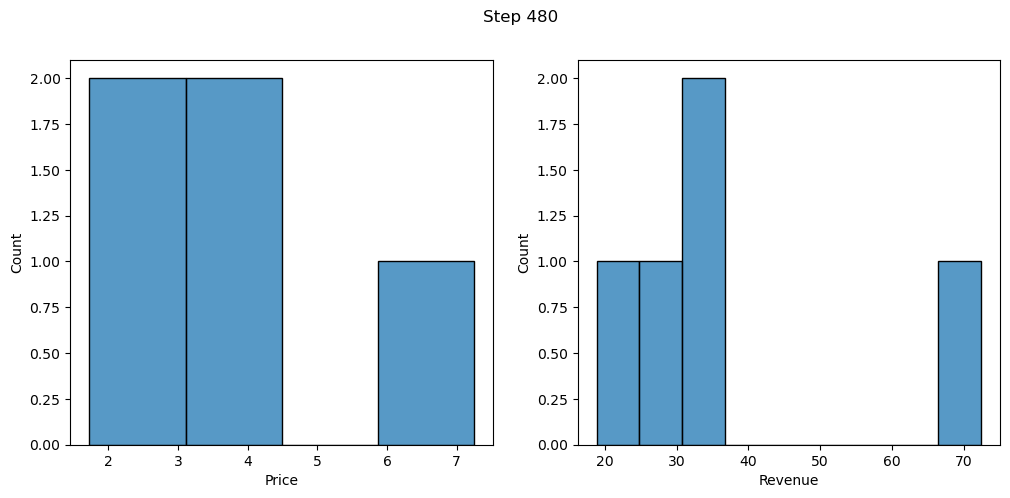

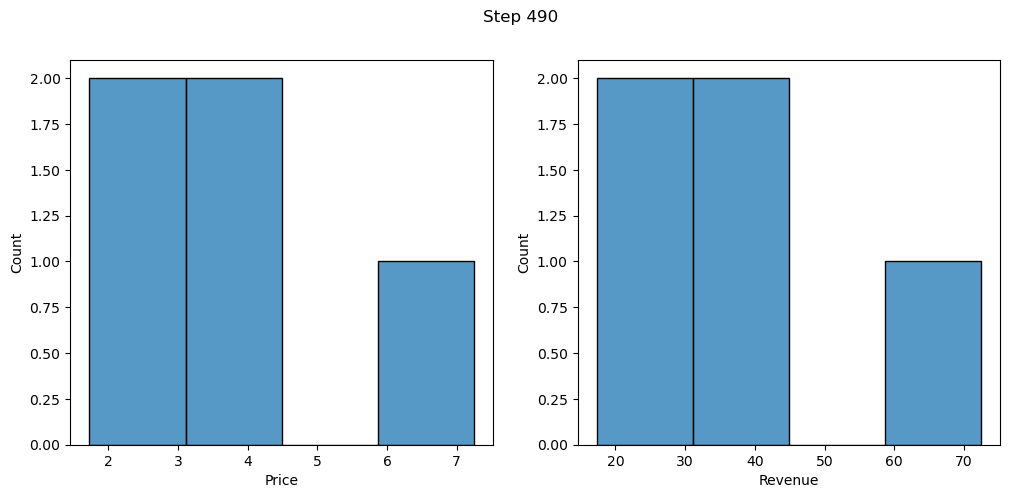

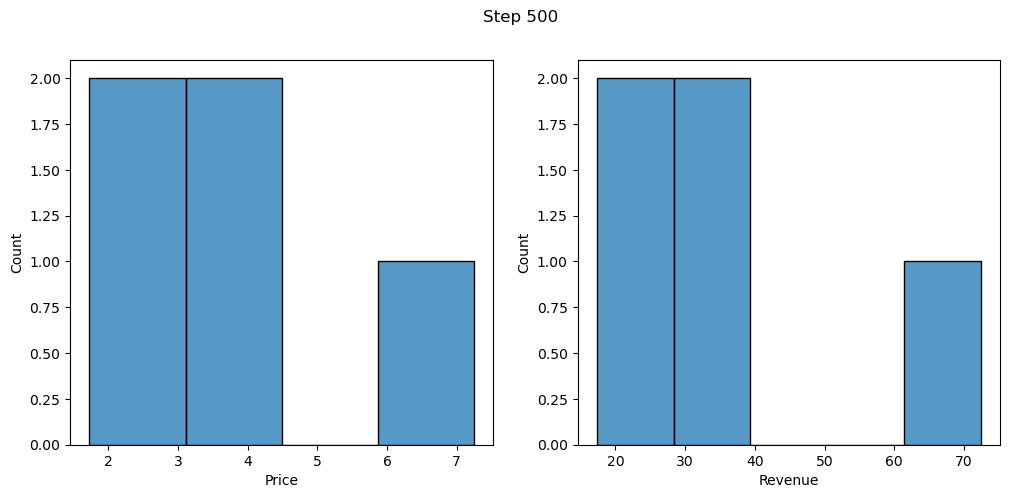

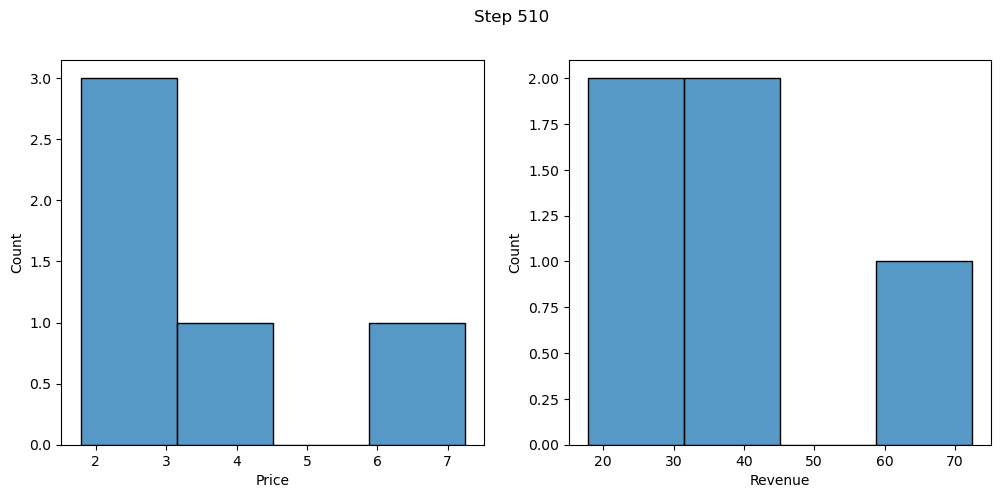

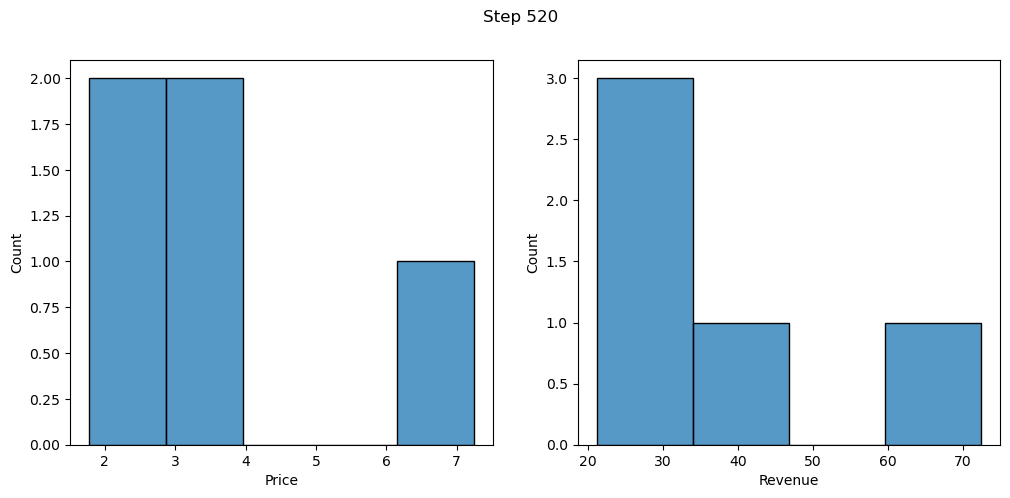

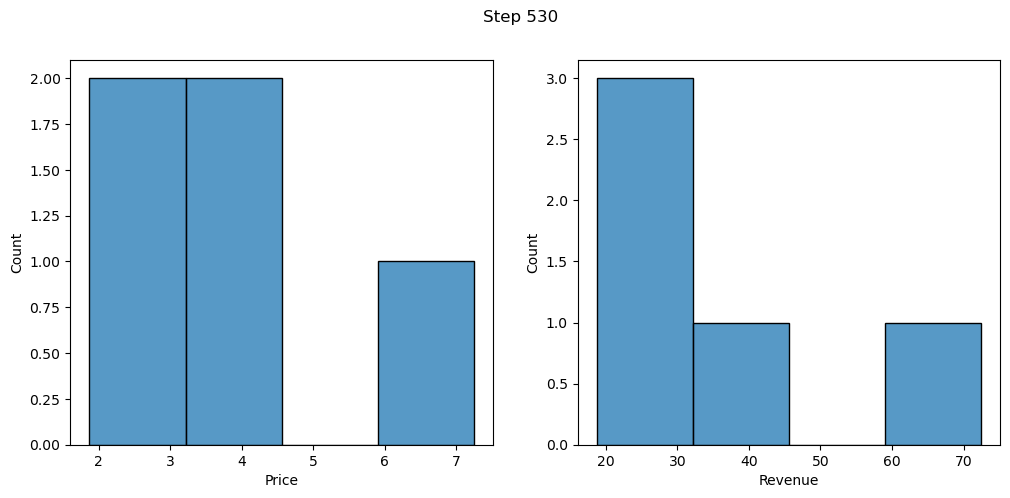

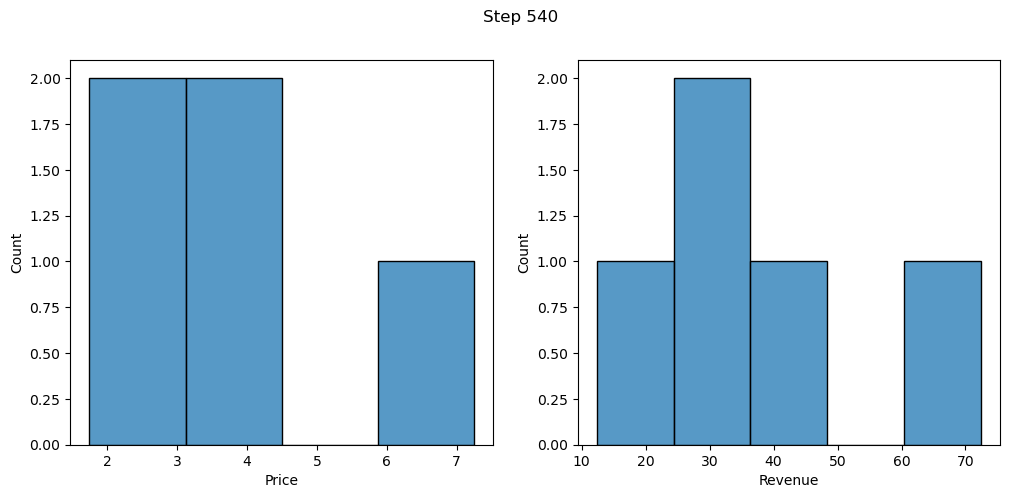

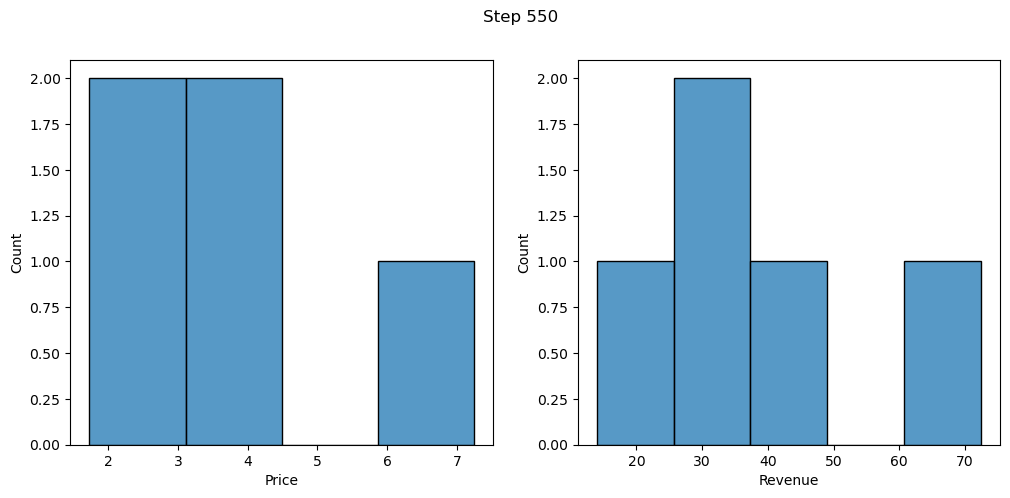

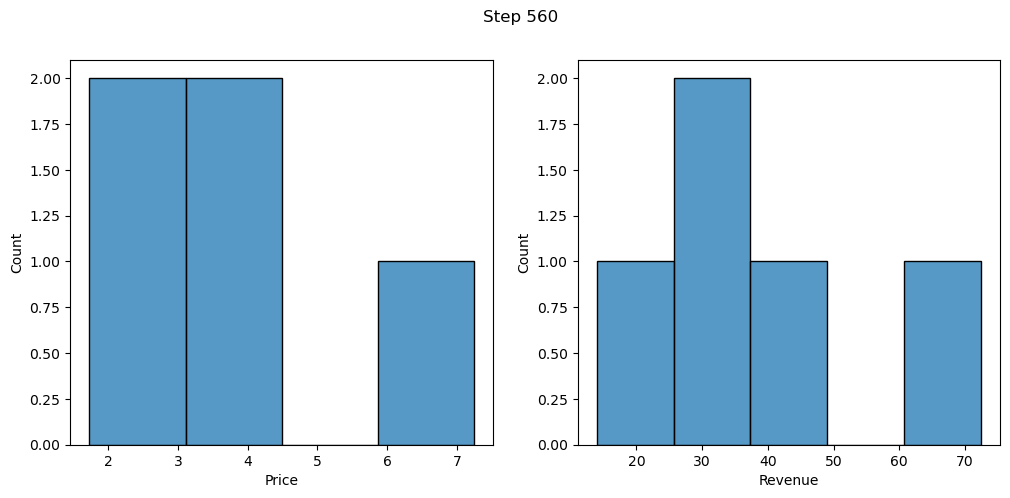

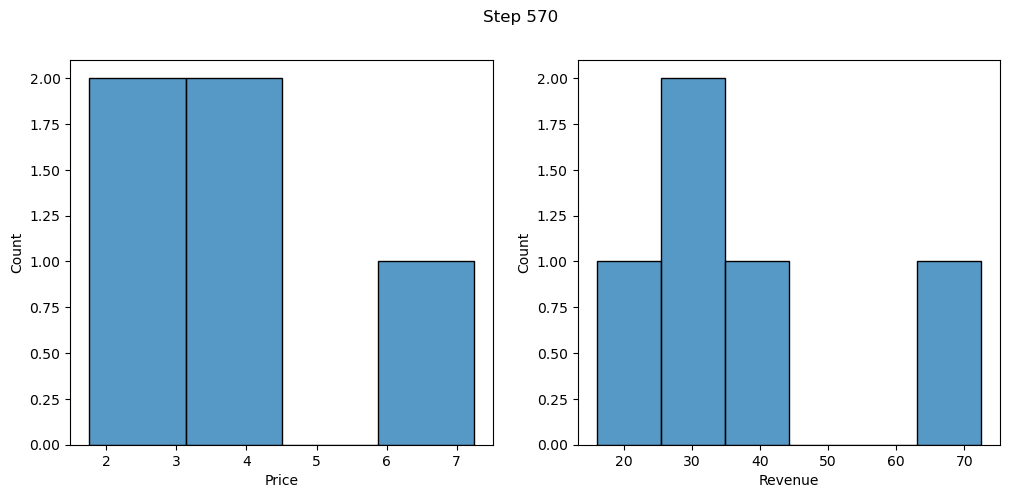

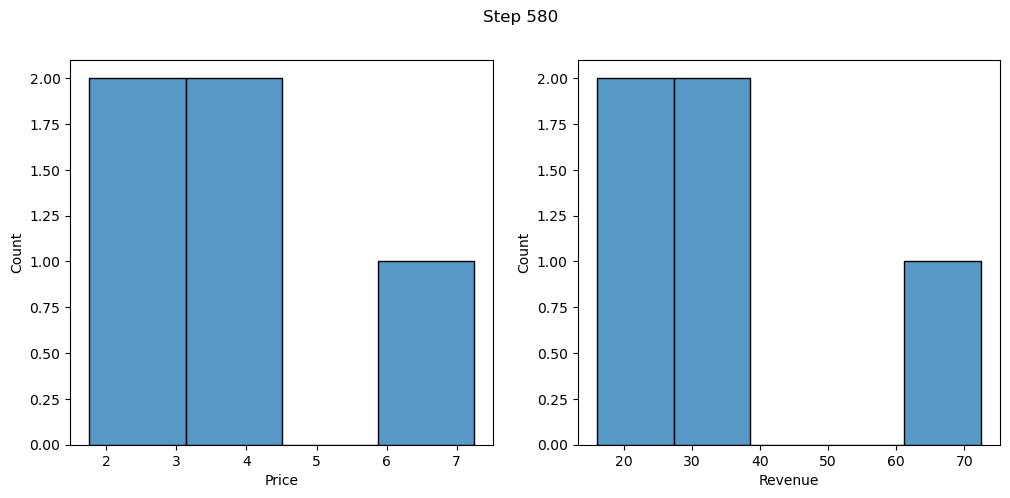

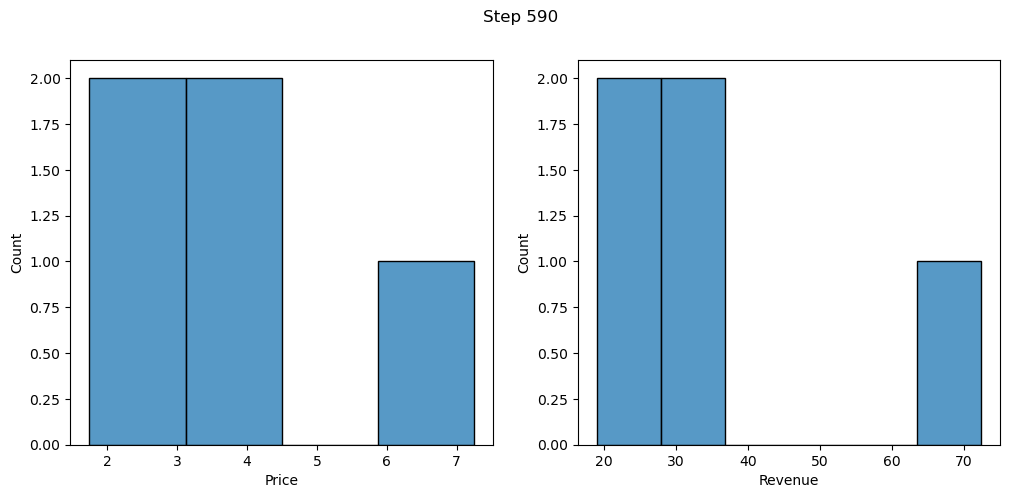

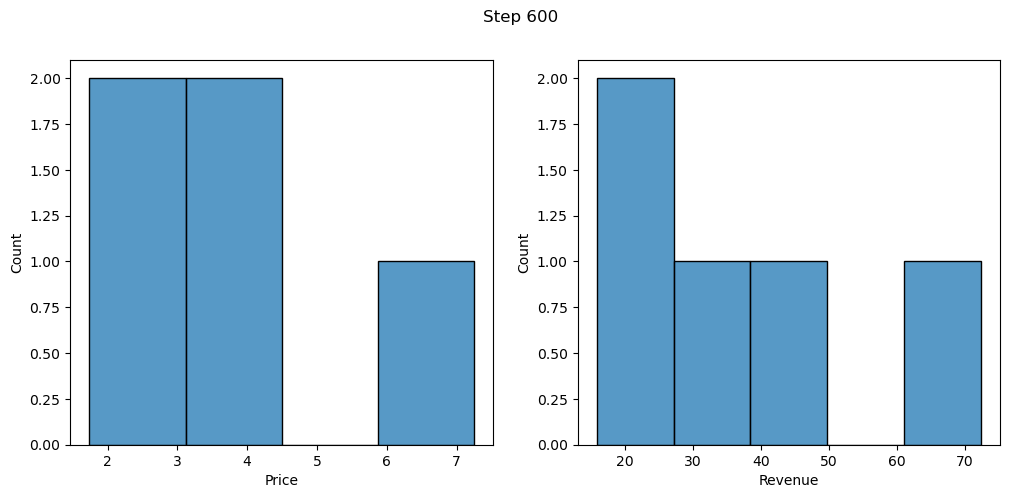

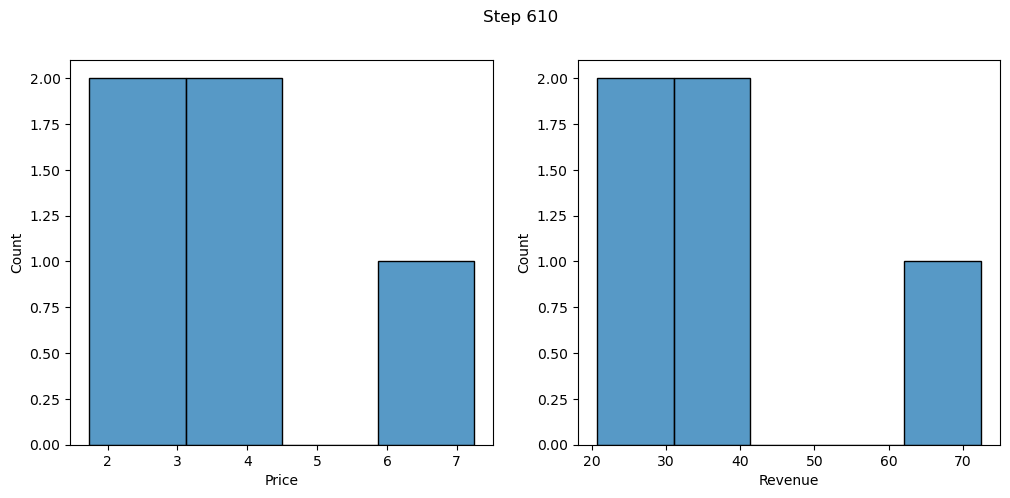

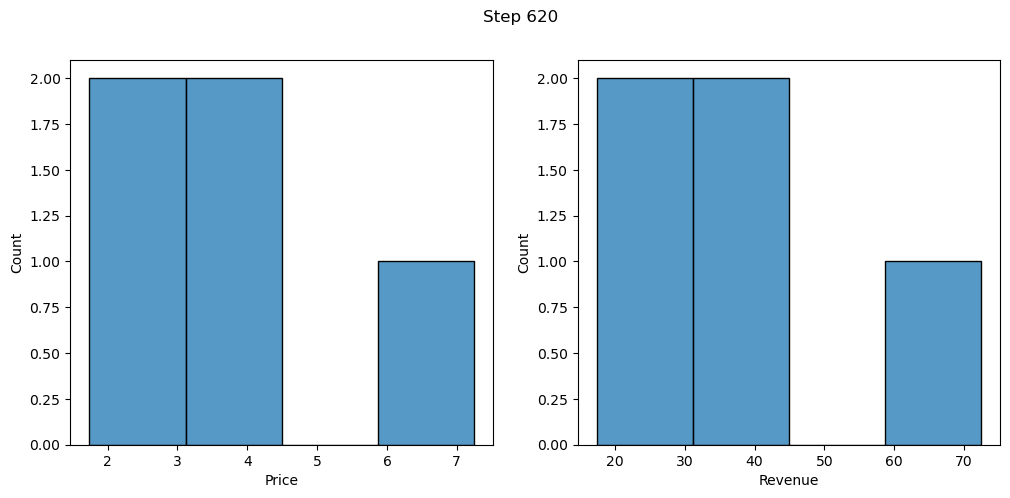

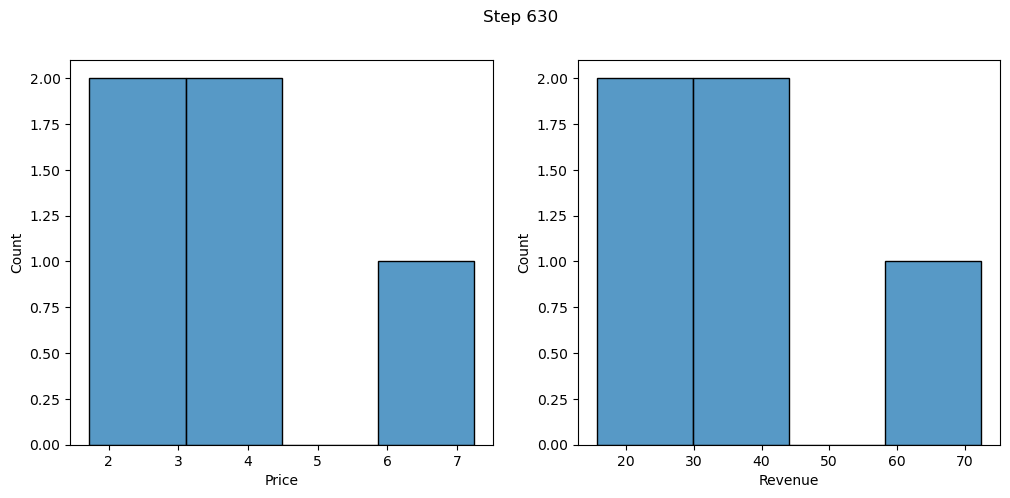

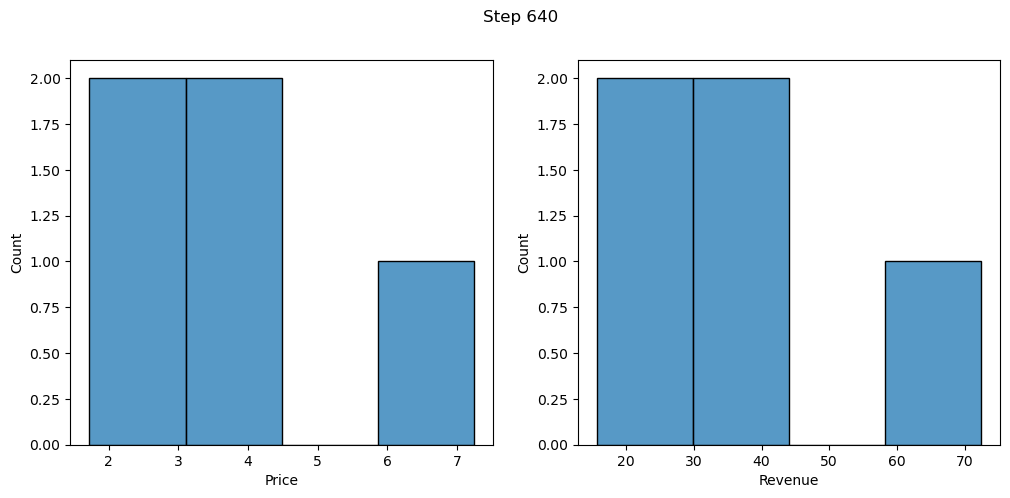

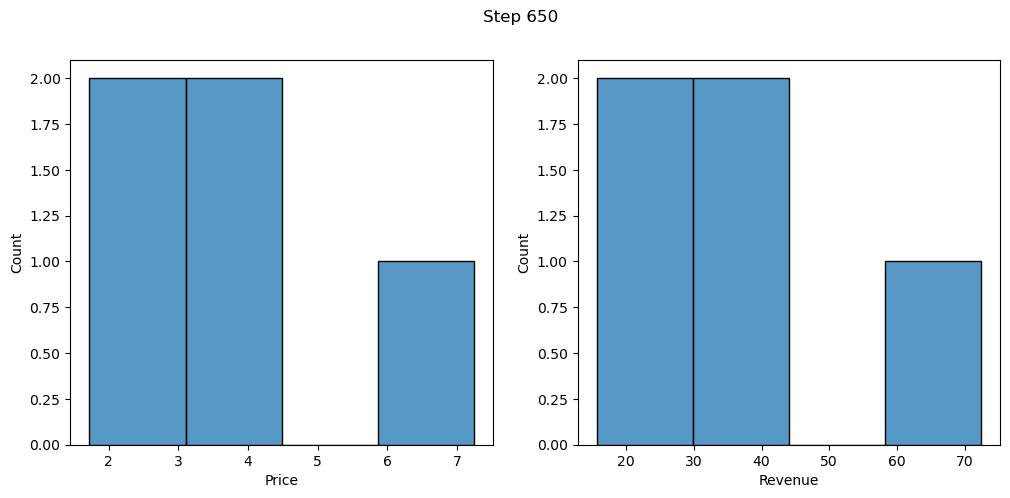

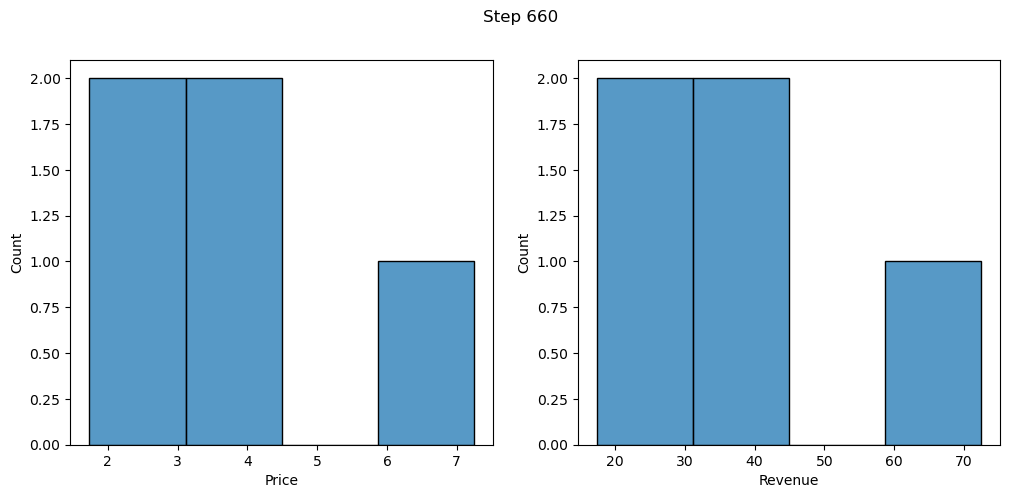

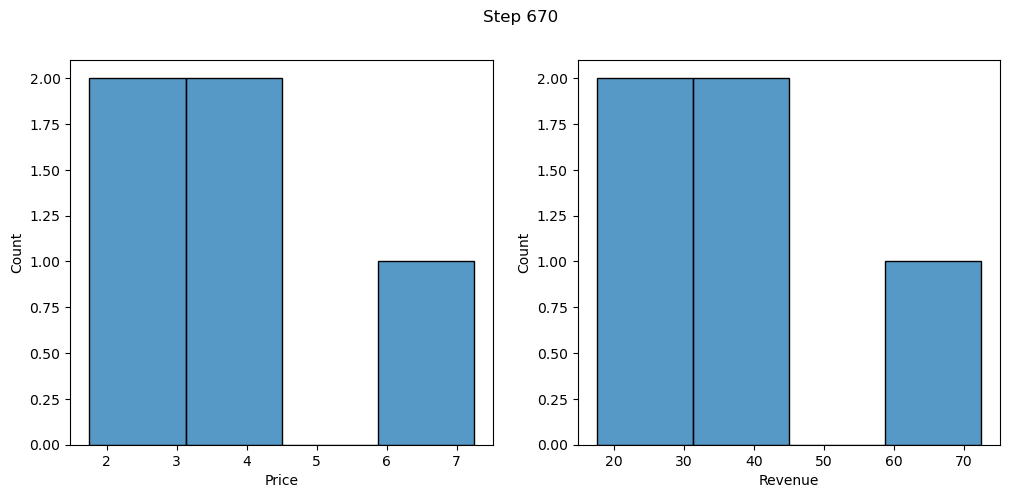

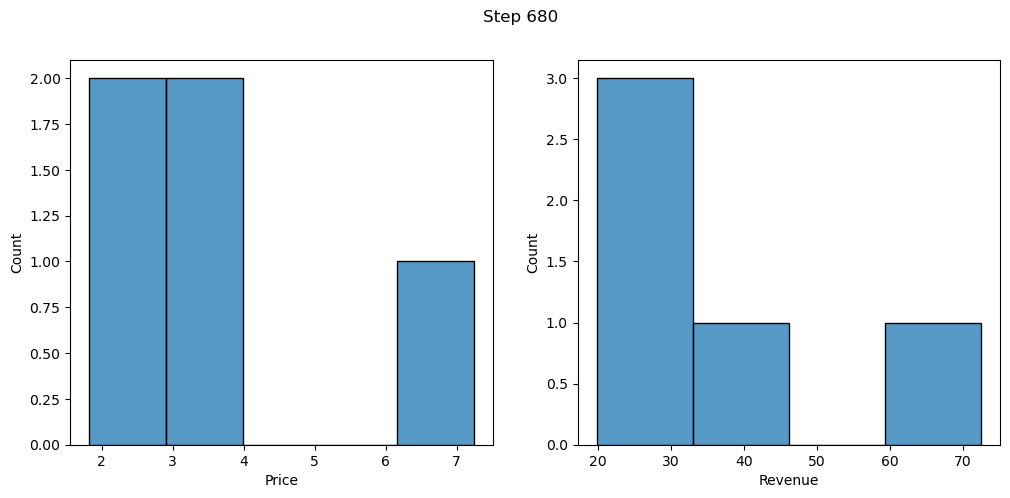

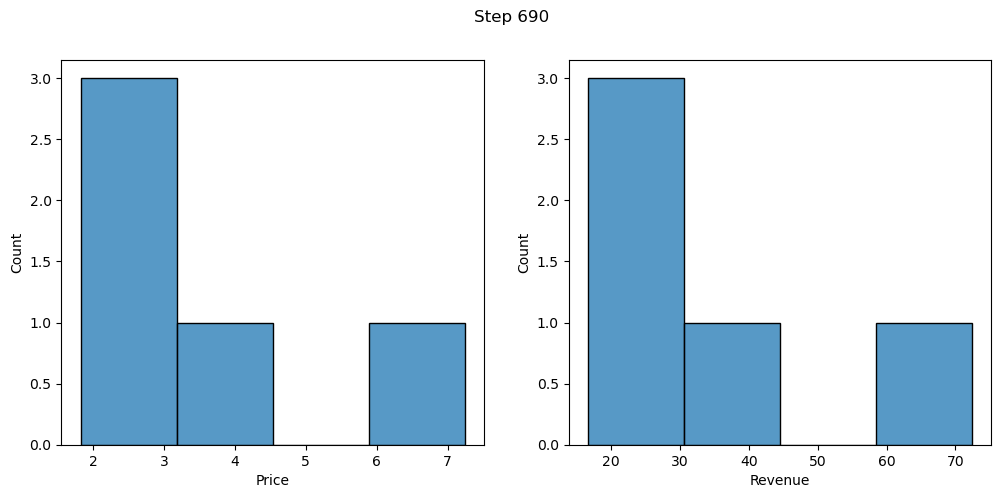

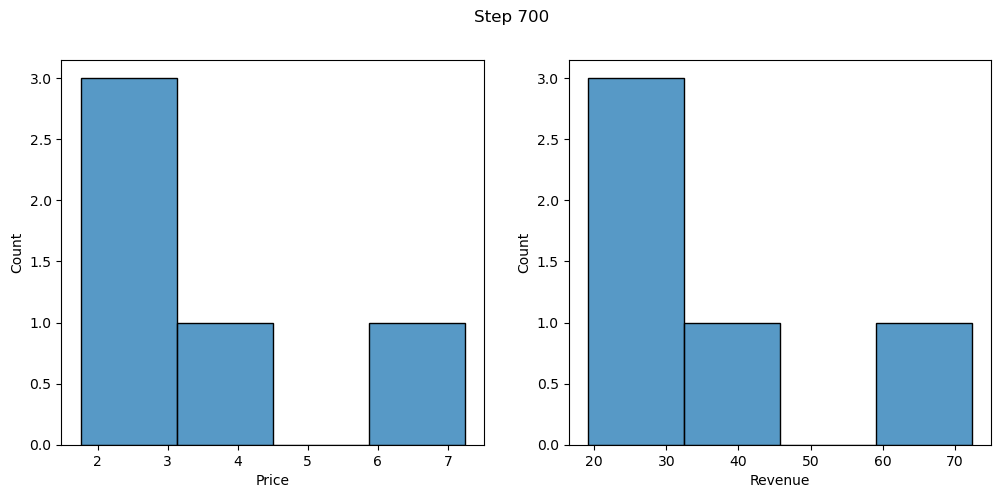

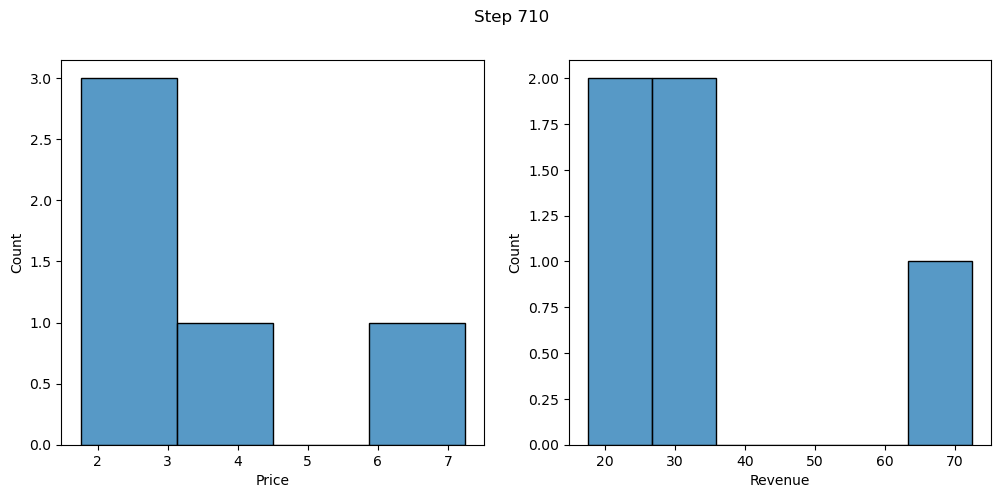

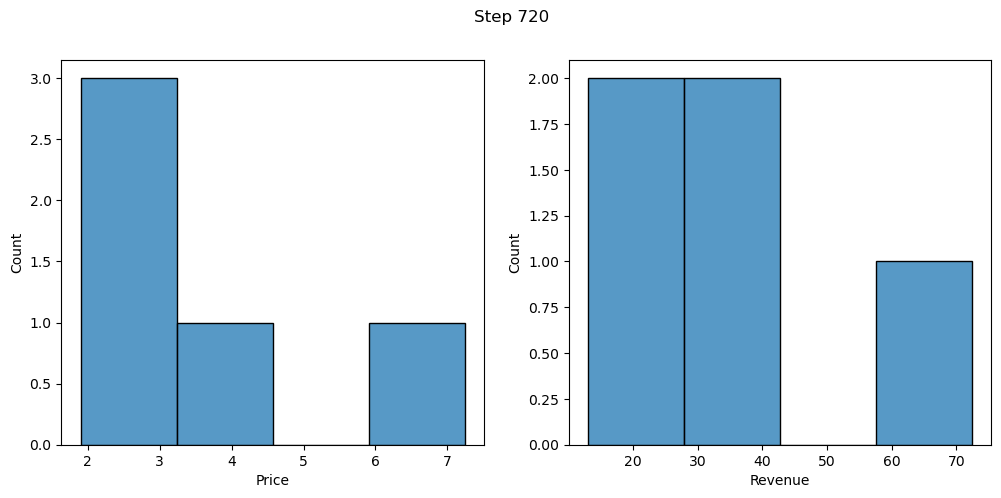

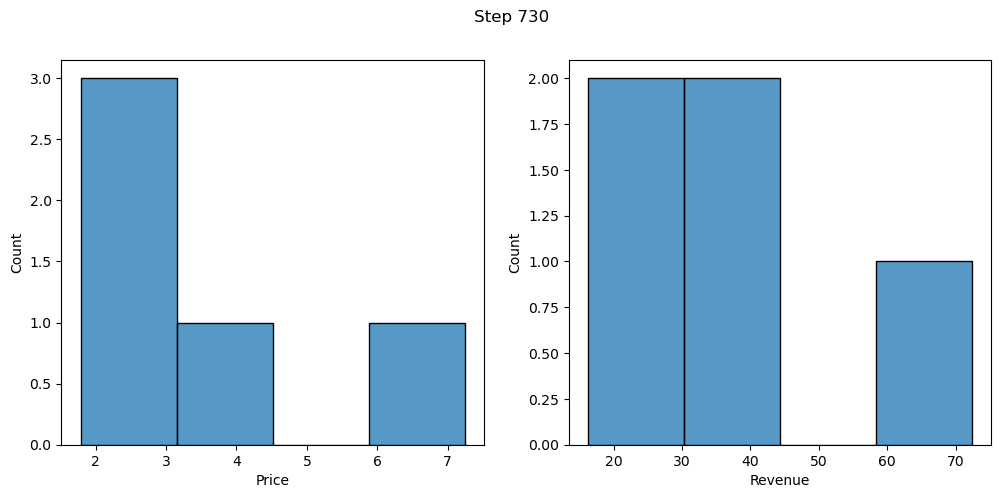

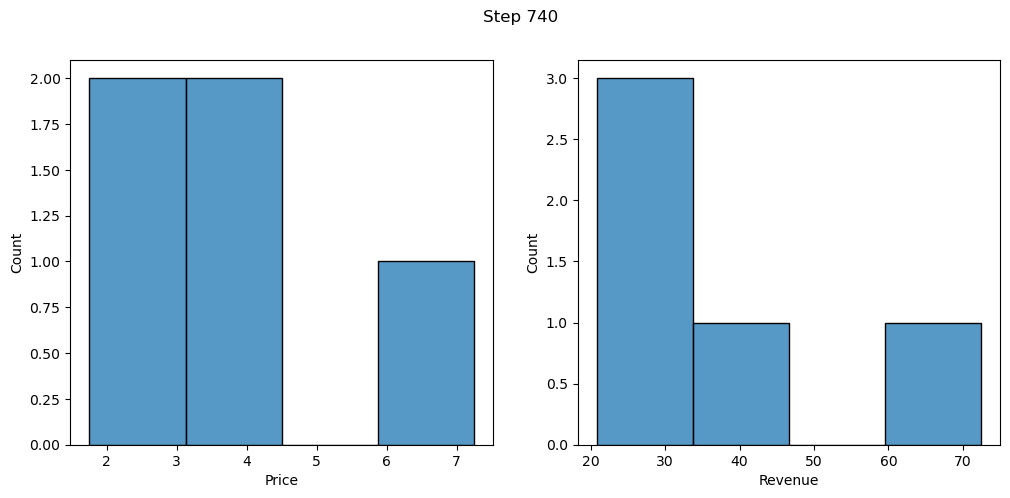

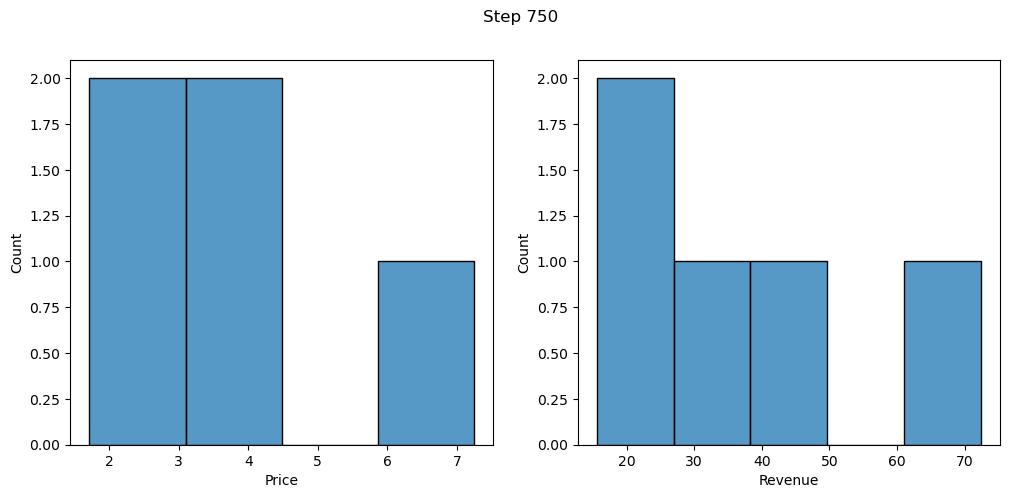

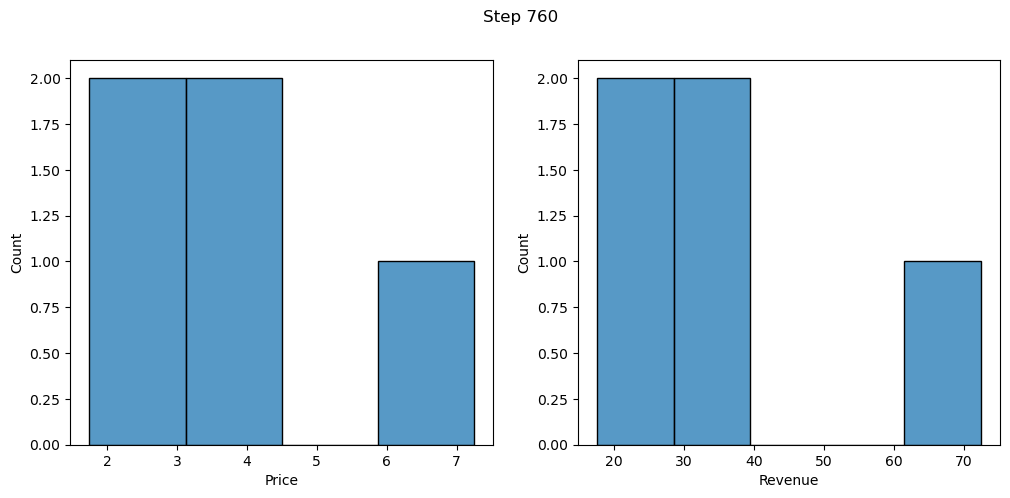

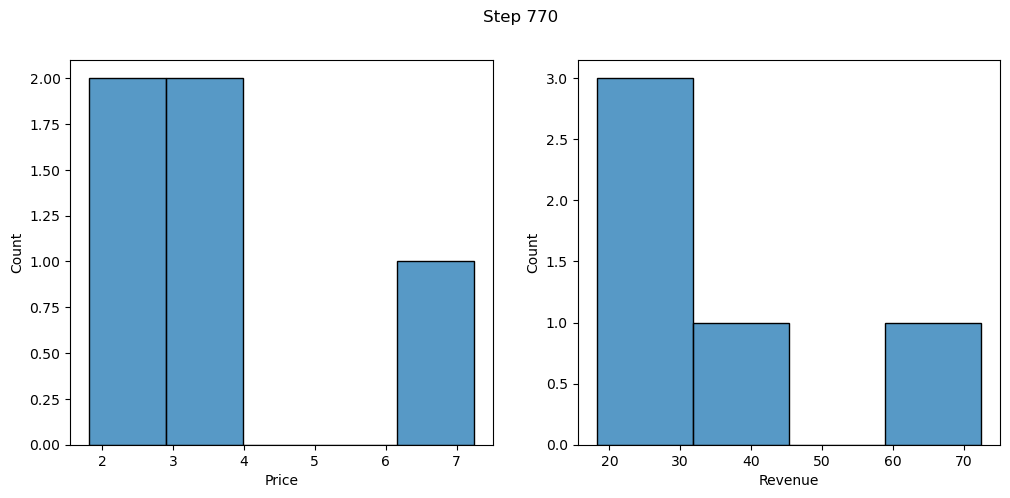

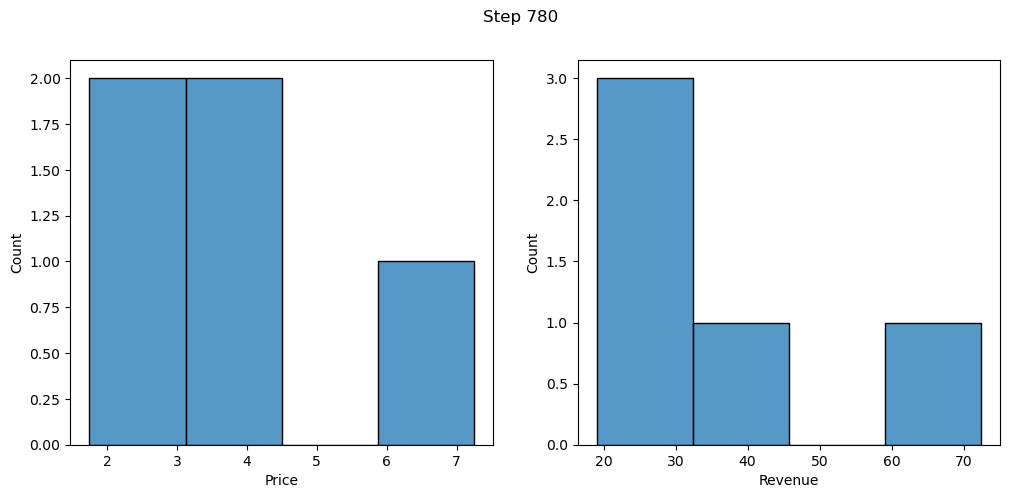

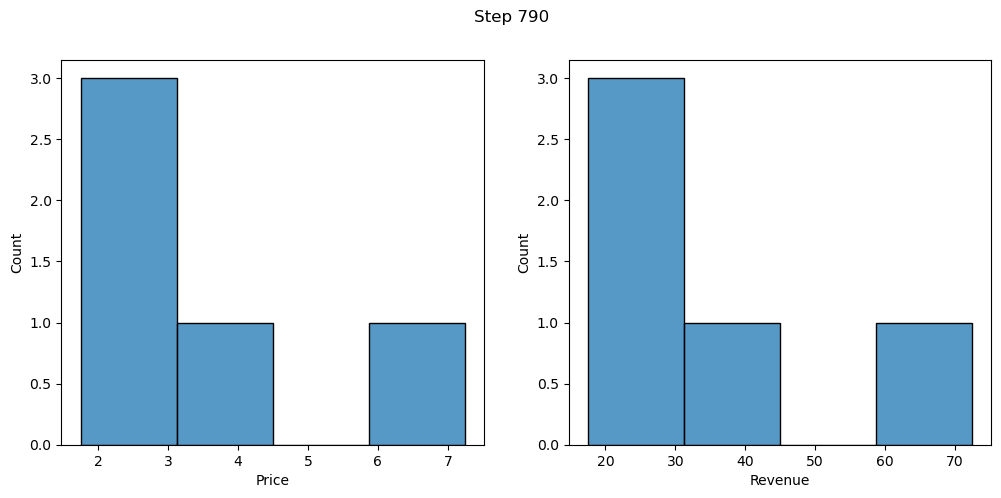

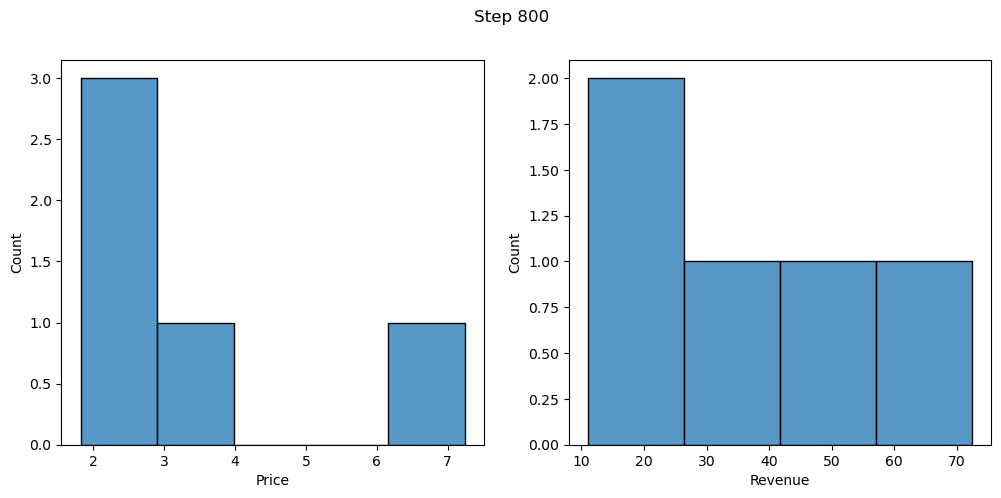

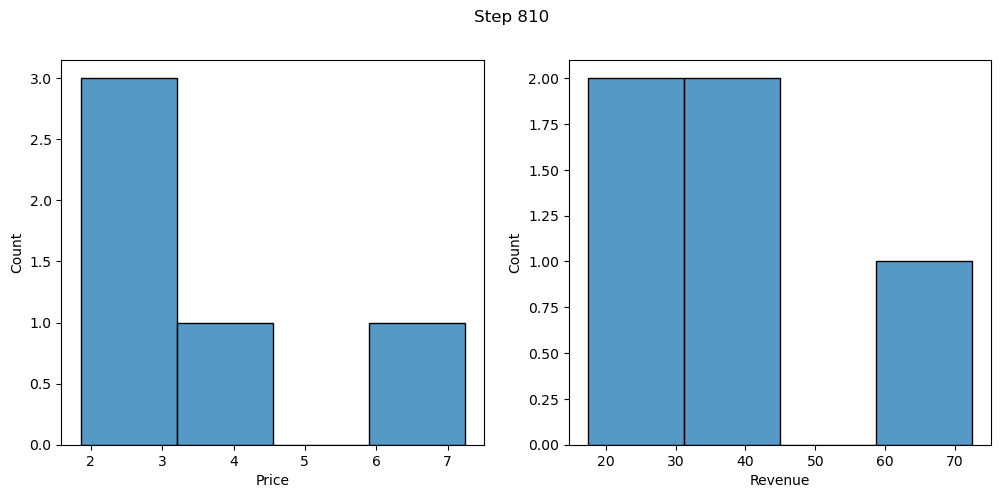

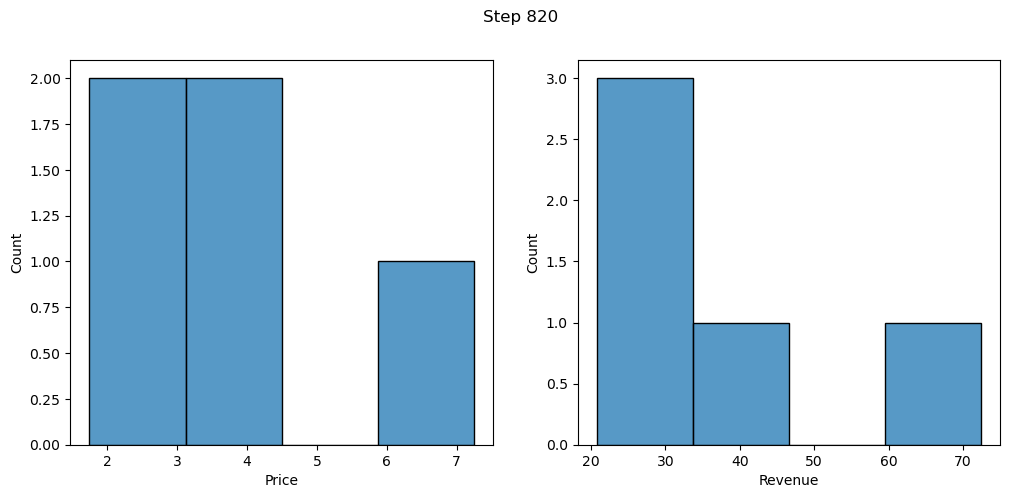

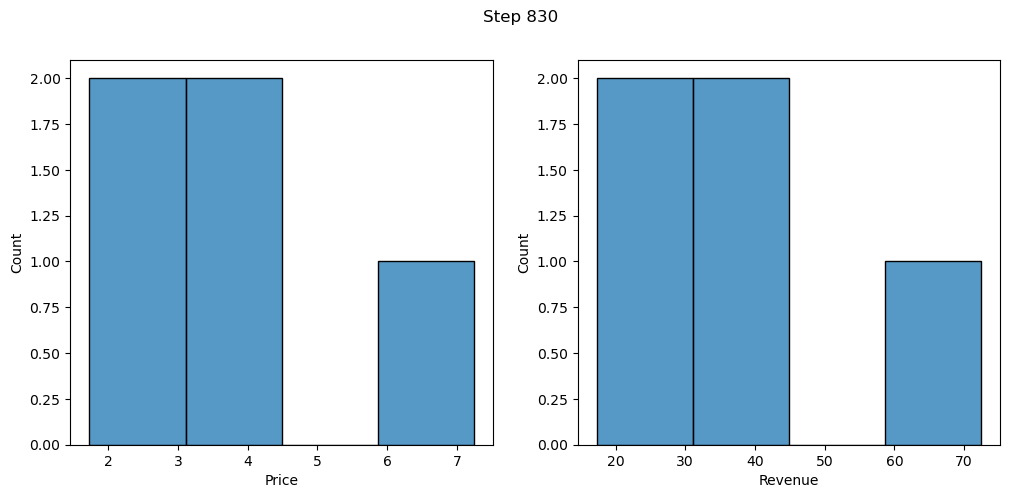

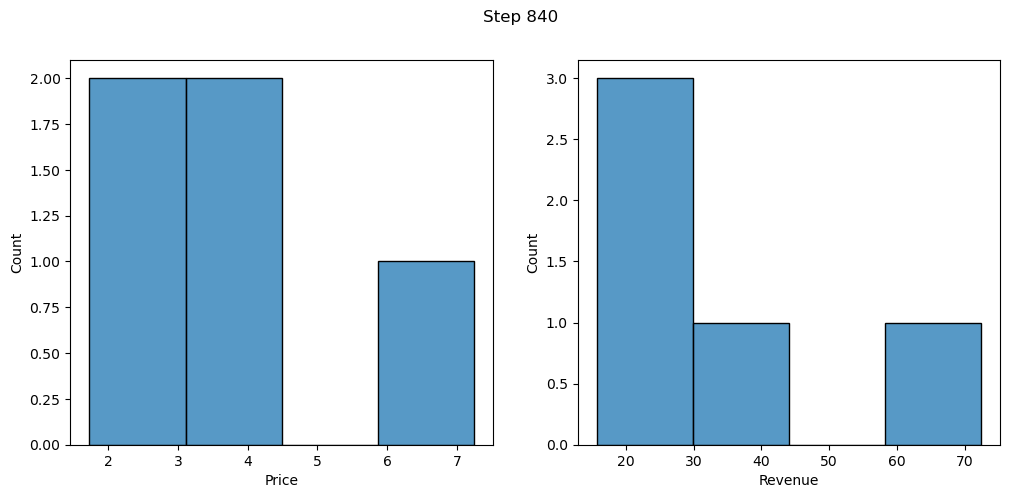

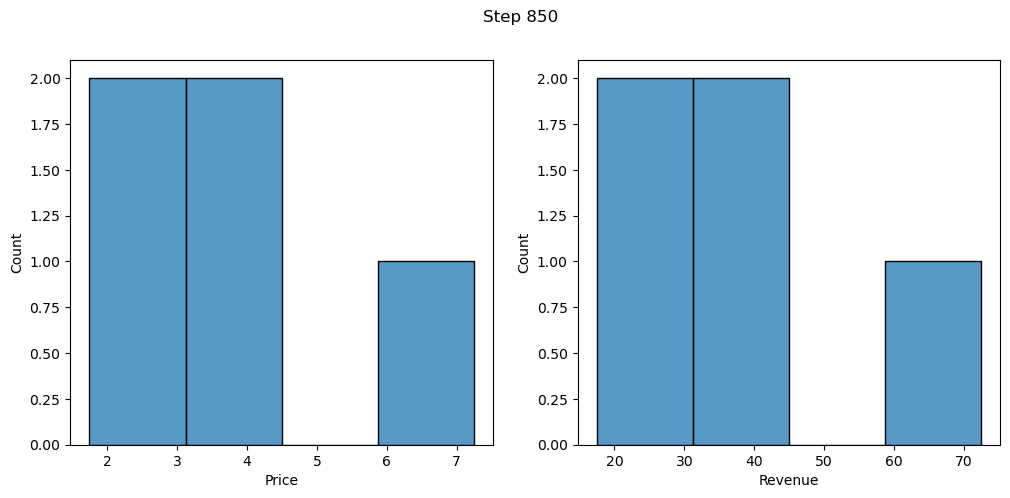

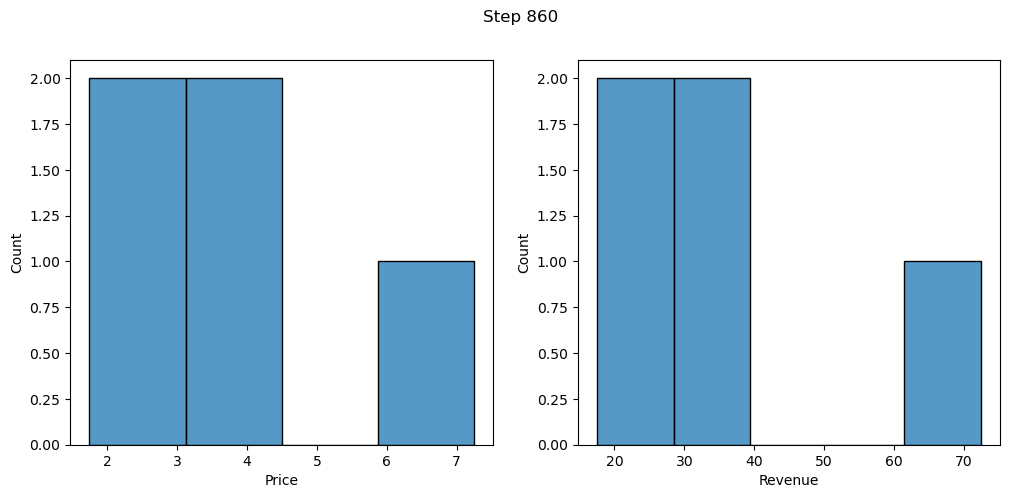

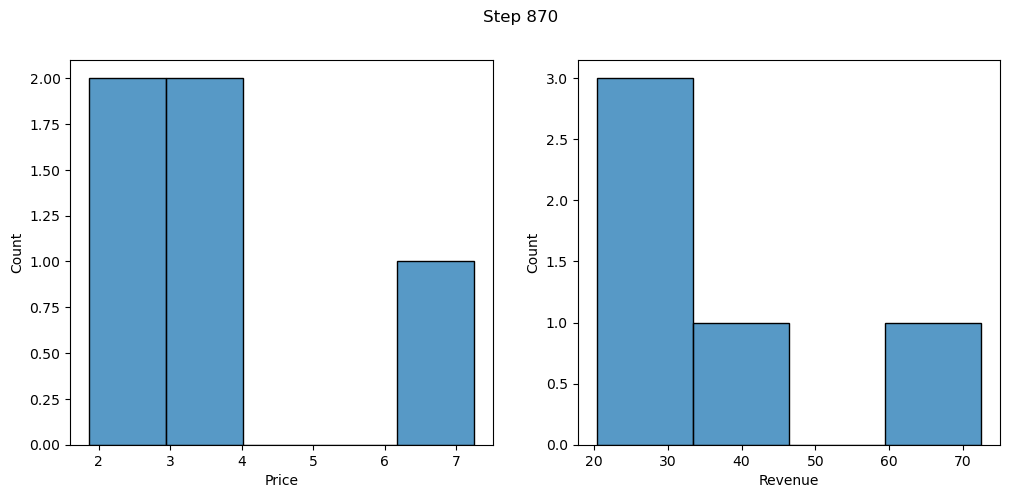

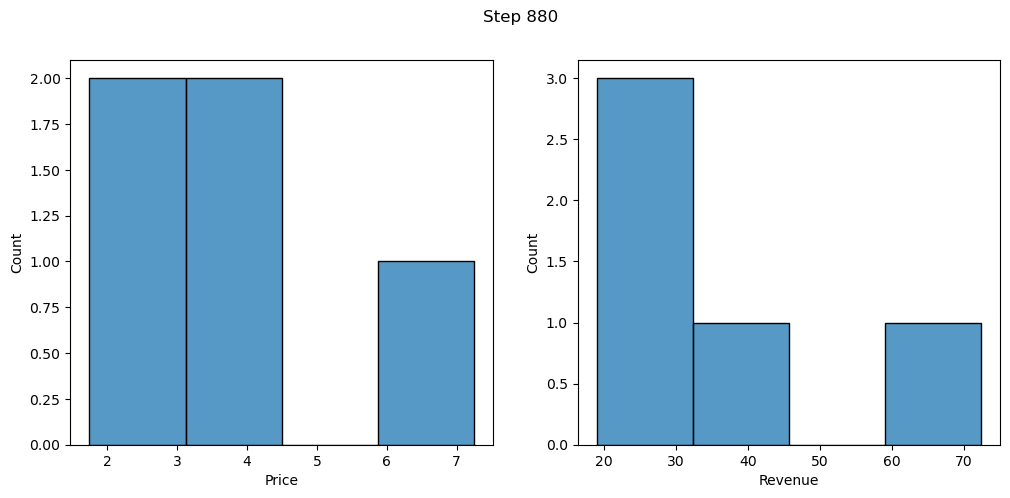

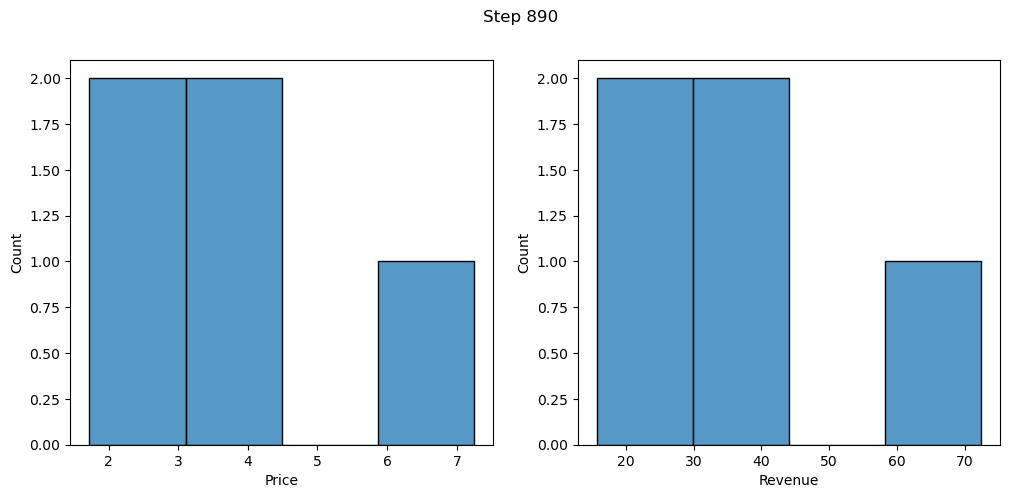

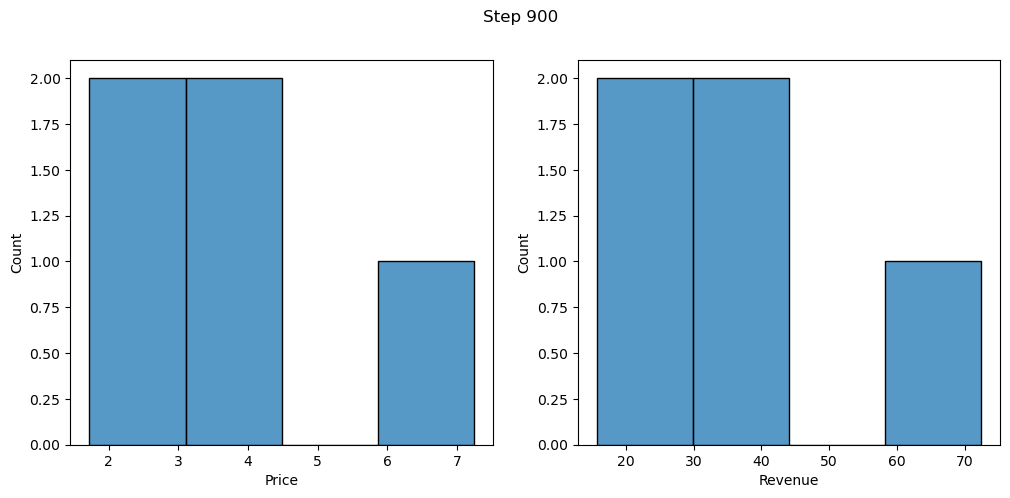

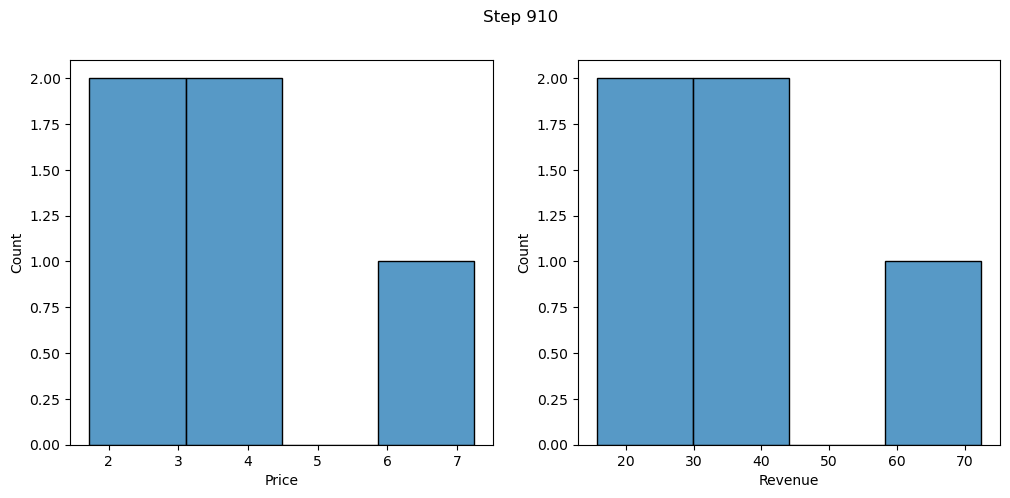

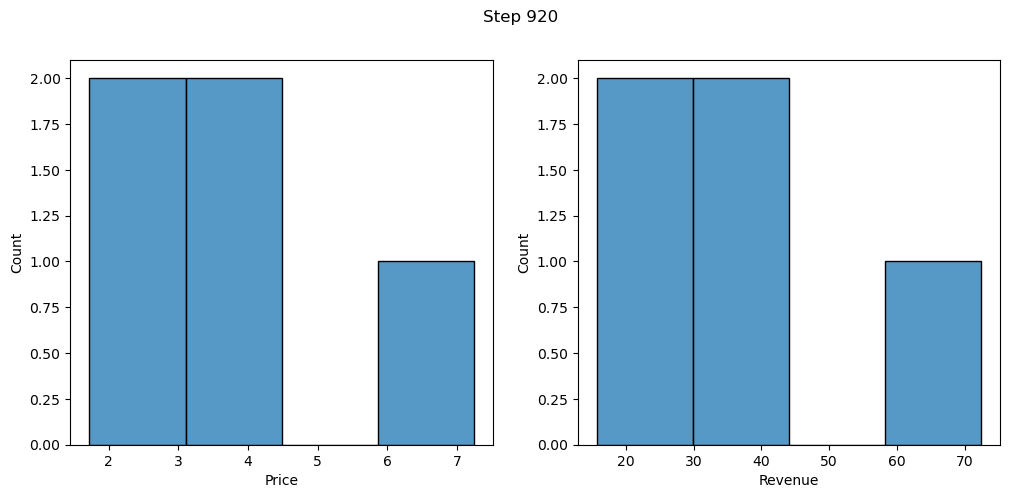

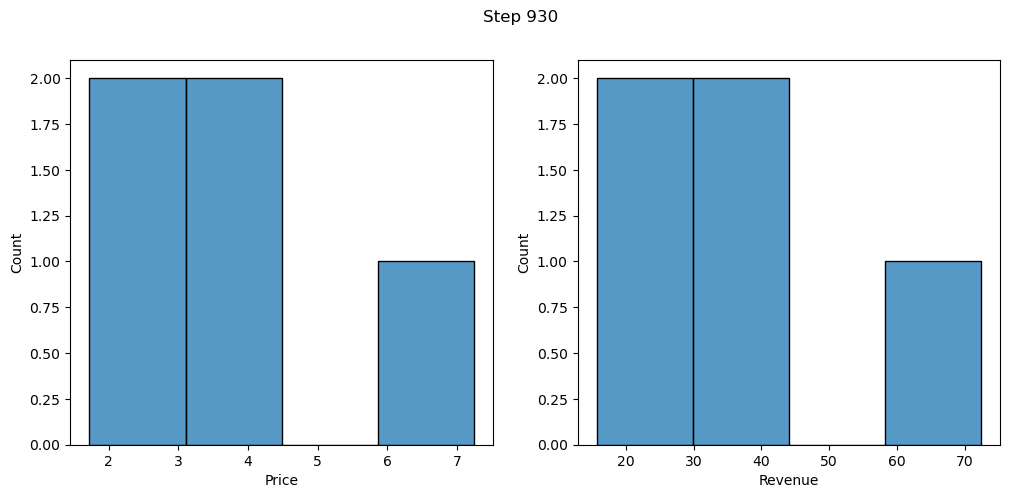

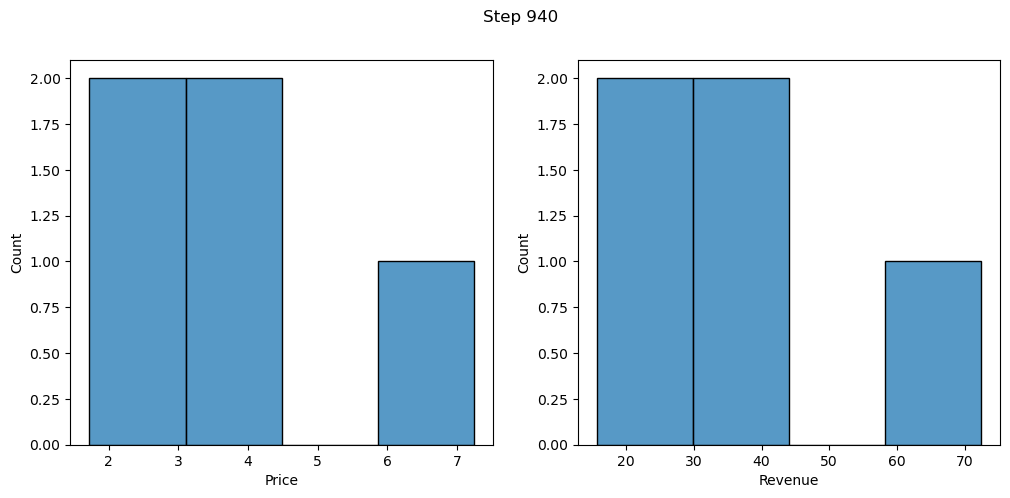

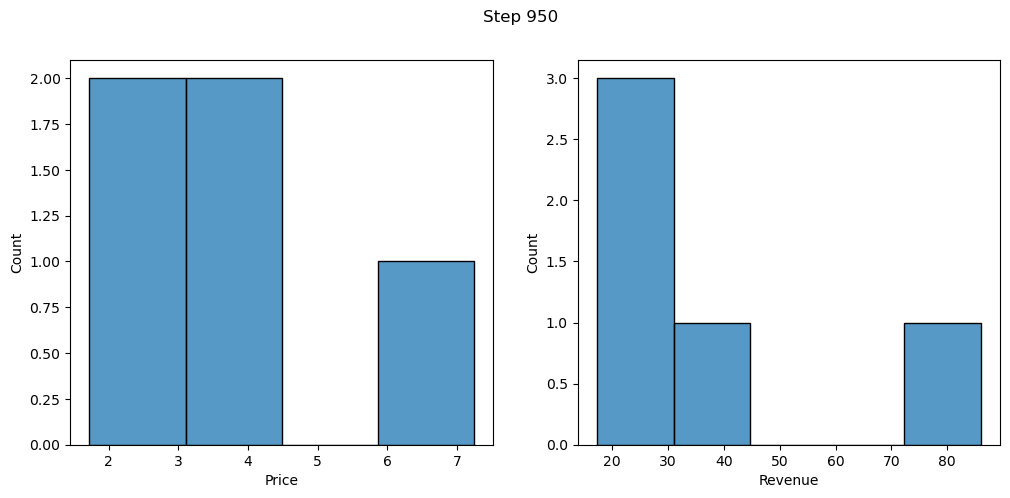

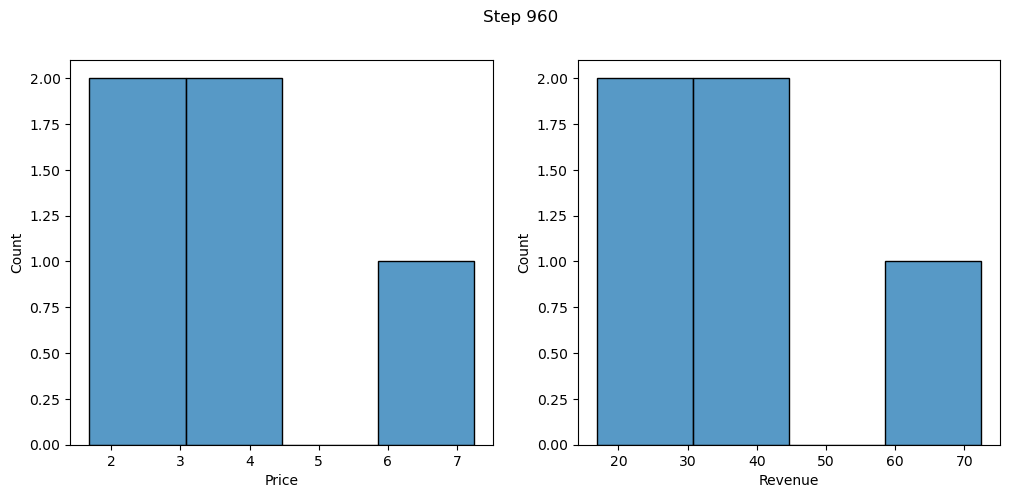

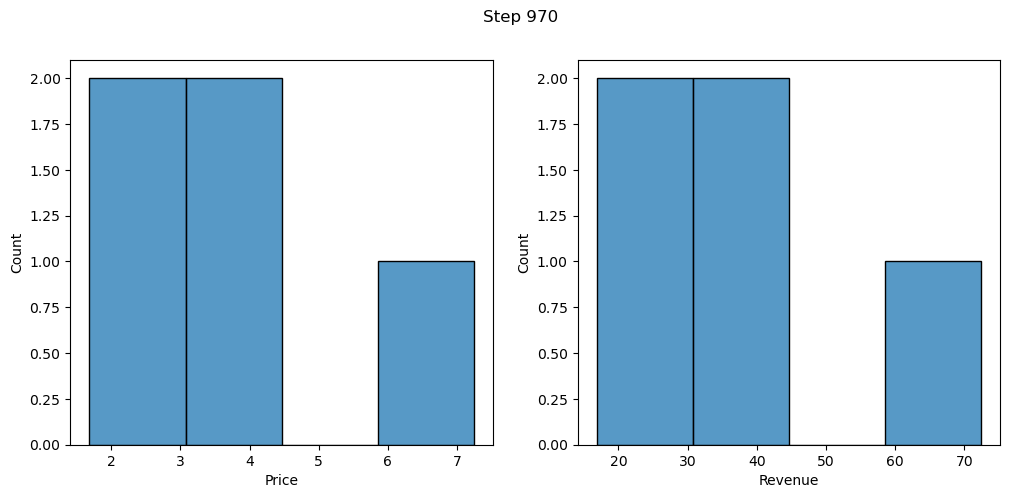

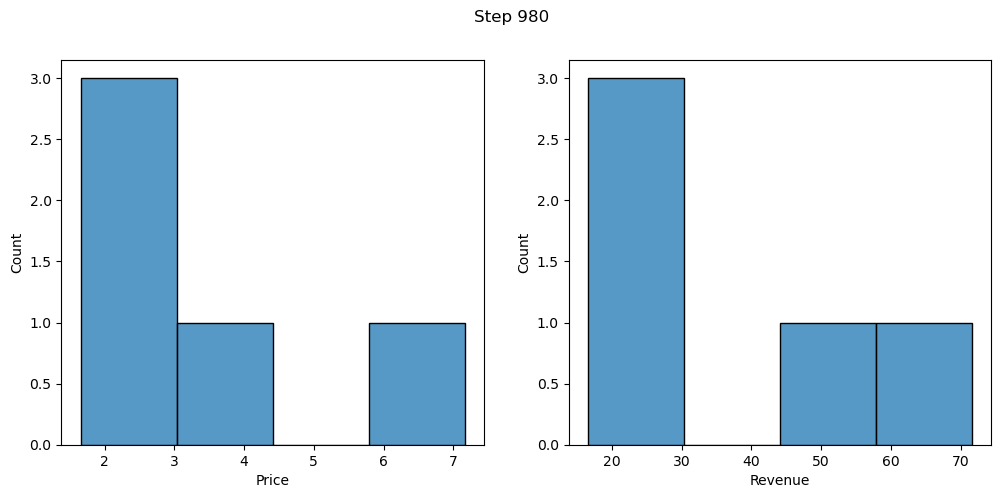

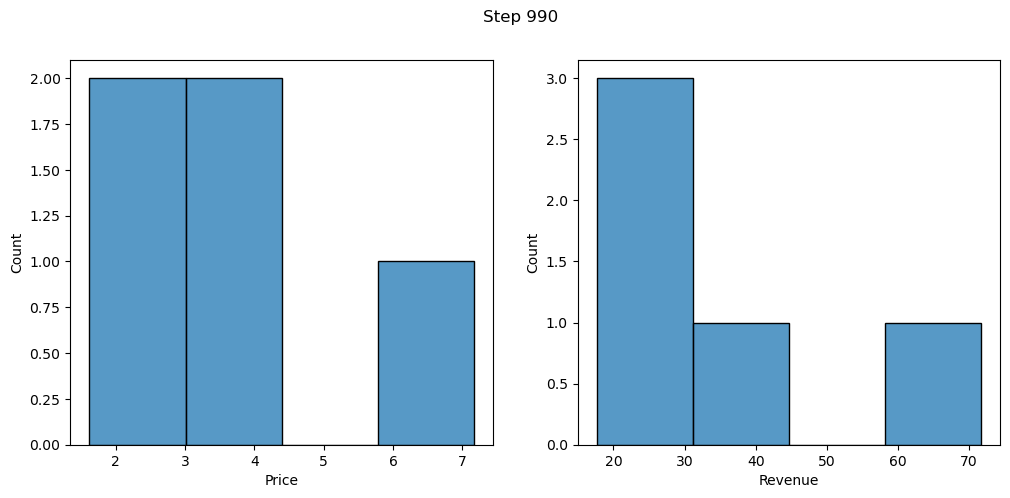

In [20]:

# for each step plot use seaborn to do a 1x2 plot with the distribution of the "Price" and "Revenue" of the firms
for i in range(steps):
    if i % 10 == 0:
        df1 = df[df["Step"] == i]
        df1 = df1[df1["Type"] == "Firm"]
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))

        sns.histplot(df1["Price"], ax=ax[0])
        sns.histplot(df1["Revenue"], ax=ax[1])
        # set the title of the plot to the step
        fig.suptitle("Step " + str(i))
        plt.show()


In [21]:
firms = df.loc[df['Type'] == "Firm"]
df.loc[(df['Type'] == "Firm") & (df['Step'] == 99)]['Revenue'].sum()
hhi = pd.DataFrame(data={'step': range(0,100)})
hhi = hhi.assign(volume=lambda x: df.loc[(df['Type'] == "Firm") & (df['Step'] == x.step)]['Revenue'].sum())
hhi 

ValueError: Can only compare identically-labeled Series objects